In [710]:
import sys
sys.path.append("../utils/")
from course_utils import *
import churn_analysis as churn
from importlib import reload
from IPython.display import display, HTML
reload(churn)

#data = pd.read_csv(r'../data/Cell2Cell_data.csv', header=0, sep=',')
customers_data = pd.read_csv(r'../data/updated_dataHack4FI_data.csv', header=0, sep=',', delimiter=' *, *', encoding="utf-8", skipinitialspace=True)
customers_data.head(10)

,customer_guid,policy_id,AGE,gender,name,months_premium,months_with_network,months_on_freemium,churned,Branch,...,STK_spend_3,STK_spend_4,STK_spend_5,STK_spend_6,ARPU_spend_1,ARPU_spend_2,ARPU_spend_3,ARPU_spend_4,ARPU_spend_5,ARPU_spend_6
0,f5a8075c94f242c99425454419bfcbe0,1748809,8,F,Riziki+ Personal,2,54.000,0,YES,Kasarani,...,2 636 480,3 231 100,1 866 050,1 187 200,633,865,661,439,1 415,1 194
1,fc2533f1fa074d03b76c4a27815e279e,1748391,45,M,Riziki+ Personal,2,55.000,7,YES,Thika Makongeni,...,11 500,130 455,55 000,271 263,5,9,4,12,21,11
2,f47fbcb9996a44d9a3be6a7631d614e6,1748385,65,M,Riziki+ Personal,2,49.000,8,YES,Machakos,...,69 000,44 600,51 000,38 150,39,20,29,30,8,32
3,49d75788e93f450b90263bb9bfa3255c,1748251,55,F,Riziki+ Personal,2,29.000,8,YES,Ngara,...,25 550,92 500,25 600,63 400,135,23,51,252,1,142
4,b1acba3fd0c04b05b42d60d62c9a7e8d,1748412,41,F,Riziki+ Personal,2,45.000,9,YES,Kasarani,...,96 000,19 800,49 980,30 680,78,119,199,349,268,172
5,605b7691436c4d6d8a8b9535a8cc9898,1747298,44,F,Riziki+ Personal,2,57.000,10,YES,Gatundu,...,50,150,-,300,61,28,62,79,-,-
6,48380b9ff8894b75ba0999c2a1da7798,1748785,45,M,Riziki+ Personal,2,35.000,13,YES,Kitale,...,1 100,74 950,10 050,-,5,98,56,406,51,3
7,0d9a549a335746cc871e347a10de16c2,1748116,48,F,Riziki+ Personal,2,55.000,14,YES,Keroka,...,1 251,4 000,9 860,-,-,-,-,-,-,-
8,0bde9d342c4449e1b415ad3d105b3b10,1748209,45,M,Riziki+ Personal,2,40.000,14,YES,Nyeri,...,7 750,3 000,16 850,5 100,99,101,63,-,58,114
9,8e21a913b4a744b6b0a649394fa98015,1739505,40,M,Riziki+ Personal,2,24.000,14,YES,Kenyatta Avenue,...,-,-,-,-,17,50,-,-,-,-


In [711]:
customers_data.shape

(1186, 23)

In [712]:
customers_data.columns

Index(['customer_guid', 'policy_id', 'AGE', 'gender', 'name', 'months_premium',
       'months_with_network', 'months_on_freemium', 'churned', 'Branch',
       'Region', 'STK_spend_1', 'STK_spend_2', 'STK_spend_3', 'STK_spend_4',
       'STK_spend_5', 'STK_spend_6', 'ARPU_spend_1', 'ARPU_spend_2',
       'ARPU_spend_3', 'ARPU_spend_4', 'ARPU_spend_5', 'ARPU_spend_6'],
      dtype='object')

In [713]:
customers_data.columns = customers_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [714]:
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())

    except:
        pass
    return x
# Apply to remove_whitespace to entire Dataframe
customers_data = customers_data.applymap(remove_whitespace)

In [715]:
customers_data.columns

Index(['customer_guid', 'policy_id', 'age', 'gender', 'name', 'months_premium',
       'months_with_network', 'months_on_freemium', 'churned', 'branch',
       'region', 'stk_spend_1', 'stk_spend_2', 'stk_spend_3', 'stk_spend_4',
       'stk_spend_5', 'stk_spend_6', 'arpu_spend_1', 'arpu_spend_2',
       'arpu_spend_3', 'arpu_spend_4', 'arpu_spend_5', 'arpu_spend_6'],
      dtype='object')

In [716]:
customers_data["stk_spend_1"] = pd.to_numeric(customers_data["stk_spend_1"], errors='coerce')
customers_data["stk_spend_2"] = pd.to_numeric(customers_data["stk_spend_2"], errors='coerce')
customers_data["stk_spend_3"] = pd.to_numeric(customers_data["stk_spend_3"], errors='coerce')
customers_data["stk_spend_4"] = pd.to_numeric(customers_data["stk_spend_4"], errors='coerce')
customers_data["stk_spend_5"] = pd.to_numeric(customers_data["stk_spend_5"], errors='coerce')
customers_data["stk_spend_6"] = pd.to_numeric(customers_data["stk_spend_6"], errors='coerce')
customers_data["arpu_spend_1"] = pd.to_numeric(customers_data["arpu_spend_1"], errors='coerce')
customers_data["arpu_spend_2"] = pd.to_numeric(customers_data["arpu_spend_2"], errors='coerce')
customers_data["arpu_spend_3"] = pd.to_numeric(customers_data["arpu_spend_3"], errors='coerce')
customers_data["arpu_spend_4"] = pd.to_numeric(customers_data["arpu_spend_4"], errors='coerce')
customers_data["arpu_spend_5"] = pd.to_numeric(customers_data["arpu_spend_5"], errors='coerce')
customers_data["arpu_spend_6"] = pd.to_numeric(customers_data["arpu_spend_6"], errors='coerce')

In [717]:
customers_data['churned'] = customers_data['churned'].replace("YES",1)
customers_data['churned'] = customers_data['churned'].replace("NO",0)
customers_data['stk_spend_1'] = customers_data['stk_spend_1'].replace("-","0")
customers_data['stk_spend_2'] = customers_data['stk_spend_2'].replace("-","0")
customers_data['stk_spend_3'] = customers_data['stk_spend_3'].replace("-","0")
customers_data['stk_spend_4'] = customers_data['stk_spend_4'].replace("-","0")
customers_data['stk_spend_5'] = customers_data['stk_spend_5'].replace("-","0")
customers_data['stk_spend_6'] = customers_data['stk_spend_6'].replace("-","0")
customers_data['arpu_spend_1'] = customers_data['arpu_spend_1'].replace("-","0")
customers_data['arpu_spend_2'] = customers_data['arpu_spend_2'].replace("-","0")
customers_data['arpu_spend_3'] = customers_data['arpu_spend_3'].replace("-","0")
customers_data['arpu_spend_4'] = customers_data['arpu_spend_4'].replace("-","0")
customers_data['arpu_spend_5'] = customers_data['arpu_spend_5'].replace("-","0")
customers_data['arpu_spend_6'] = customers_data['arpu_spend_6'].replace("-","0")
customers_data['arpu_spend_6'] = customers_data['arpu_spend_6'].replace("-","0")
customers_data['arpu_spend_6'] = customers_data['arpu_spend_6'].replace("-","0")

In [718]:
# customers_data['customer_guid'].fillna( method ='ffill', inplace = True)
# customers_data['gender'] = customers_data['gender'].fillna( method ='ffill', inplace = True) 
# customers_data['name'] = customers_data['name'].fillna( method ='ffill', inplace = True)
# customers_data['churned'] = customers_data['churned'].fillna( method ='ffill', inplace = True)
# customers_data['branch'] = customers_data['branch'].fillna( method ='ffill', inplace = True)
# customers_data['region'] = customers_data['region'].fillna( method ='ffill', inplace = True)

In [719]:
# import re
# customers_data = customers_data.astype(str)

# customers_data = customers_data.applymap(lambda x: re.sub(r'^-$', str(np.NaN), x))

In [720]:
# filling missing value using fillna()   
customers_data = customers_data.fillna(0)

In [721]:
customers_data.isnull().values.any()

False

In [722]:
customers_data.describe()

,policy_id,age,months_premium,months_with_network,months_on_freemium,churned,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,stk_spend_5,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6
count,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000
mean,532829.175,41.517,3.290,41.931,2.593,0.622,108143.082,56717.680,132680.408,132189.697,125289.956,116760.209,279.448,309.865,293.656,260.972,263.809,253.432
std,517754.483,13.242,3.253,15.312,3.330,0.485,509225.169,409238.995,620587.558,600380.154,637250.657,512996.474,897.538,860.522,679.957,632.926,697.097,758.912
min,62.000,7.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,119221.500,32.000,1.000,30.000,0.000,0.000,82.250,0.000,887.000,289.250,60.000,102.250,2.000,10.000,20.000,10.000,2.000,0.000
50%,390678.000,40.000,2.000,45.000,1.000,1.000,8025.000,1800.000,10613.500,9133.000,8619.500,9673.000,49.000,66.000,93.000,73.500,57.500,53.000
75%,737209.000,50.000,6.000,56.000,4.000,1.000,40480.500,17322.500,46549.500,41825.250,41320.000,45015.500,204.000,233.750,259.000,219.000,196.000,195.000
max,1748809.000,120.000,16.000,61.000,14.000,1.000,8802088.000,9546431.000,9856928.000,11059673.000,13547967.000,9589190.000,18979.000,15438.000,8658.000,7179.000,8417.000,16018.000


In [723]:
# total summation of all missing values in the DataFrame
customers_data.isnull().sum().sum()

0

In [724]:
customers_data.shape

(1186, 23)

In [725]:
# dropna values in customers_data
customers_data = customers_data.dropna()
customers_data.head()

,customer_guid,policy_id,age,gender,name,months_premium,months_with_network,months_on_freemium,churned,branch,...,stk_spend_3,stk_spend_4,stk_spend_5,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6
0,f5a8075c94f242c99425454419bfcbe0,1748809,8,F,Riziki+Personal,2,54.000,0,1,Kasarani,...,2636480.000,3231100.000,1866050.000,1187200.000,633.000,865.000,661.000,439.000,1415.000,1194.000
1,fc2533f1fa074d03b76c4a27815e279e,1748391,45,M,Riziki+Personal,2,55.000,7,1,ThikaMakongeni,...,11500.000,130455.000,55000.000,271263.000,5.000,9.000,4.000,12.000,21.000,11.000
2,f47fbcb9996a44d9a3be6a7631d614e6,1748385,65,M,Riziki+Personal,2,49.000,8,1,Machakos,...,69000.000,44600.000,51000.000,38150.000,39.000,20.000,29.000,30.000,8.000,32.000
3,49d75788e93f450b90263bb9bfa3255c,1748251,55,F,Riziki+Personal,2,29.000,8,1,Ngara,...,25550.000,92500.000,25600.000,63400.000,135.000,23.000,51.000,252.000,1.000,142.000
4,b1acba3fd0c04b05b42d60d62c9a7e8d,1748412,41,F,Riziki+Personal,2,45.000,9,1,Kasarani,...,96000.000,19800.000,49980.000,30680.000,78.000,119.000,199.000,349.000,268.000,172.000


In [726]:
# using isnull() function to check for null 
customers_data.isnull().values.any()

False

In [727]:
# total summation of all missing values in the DataFrame
customers_data.isnull().sum().sum()

0

### Gender
By using the code block below, we easily visualize how Churn Rate (1-Retention Rate) looks like for each value:

In [728]:
customers_data['churned'].unique()

array([1, 0], dtype=int64)

Churned = 738
Not Churned = 448
Proportion of churned to not churned  = 164.73%


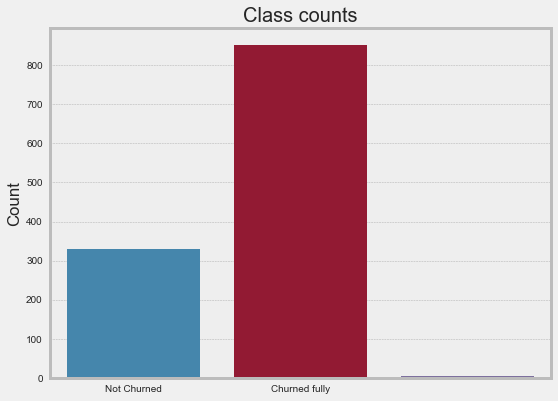

In [729]:
df = customers_data
# Get number of positve and negative examples
pos = df[df["churned"] == 1].shape[0]
neg = df[df["churned"] == 0].shape[0]
print(f"Churned = {pos}")
print(f"Not Churned = {neg}")
print(f"Proportion of churned to not churned  = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["gender"])
plt.xticks((0, 1), ["Not Churned", "Churned fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

Gender breakdown for the churn rate:

In [730]:
customers_data.groupby('gender').churned.mean()

gender
0   0.750
F   0.599
M   0.631
Name: churned, dtype: float64

Male customers are more likely to churn vs. female customers, but the difference is minimal (0.3%).

In [731]:
customers_data_descr = churn.getDfSummary(customers_data)
HTML(customers_data_descr.to_html())

,unique,top,freq,missing,distinct,mean,std,min,25%,50%,75%,max
customer_guid,1125.000,2e53ec2f534b4a748f6c999c18fda312,3.000,0.000,1125.000,nan,nan,nan,nan,nan,nan,nan
policy_id,nan,NaN,nan,0.000,1186.000,532829.175,517754.483,62.000,119221.500,390678.000,737209.000,1748809.000
age,nan,NaN,nan,0.000,64.000,41.517,13.242,7.000,32.000,40.000,50.000,120.000
gender,3.000,M,853.000,0.000,3.000,nan,nan,nan,nan,nan,nan,nan
name,2.000,Riziki+Personal,798.000,0.000,2.000,nan,nan,nan,nan,nan,nan,nan
months_premium,nan,NaN,nan,0.000,16.000,3.290,3.253,1.000,1.000,2.000,6.000,16.000
months_with_network,nan,NaN,nan,0.000,52.000,41.931,15.312,0.000,30.000,45.000,56.000,61.000
months_on_freemium,nan,NaN,nan,0.000,15.000,2.593,3.330,0.000,0.000,1.000,4.000,14.000
churned,nan,NaN,nan,0.000,2.000,0.622,0.485,0.000,0.000,1.000,1.000,1.000
branch,159.000,Headoffice,99.000,0.000,159.000,nan,nan,nan,nan,nan,nan,nan


Putting in tabular form is convenient and allows for easy comparison. The table above shows the descriptive statistics we discussed above, and also includes useful points such as count of missing values and the cardinality of the data. The distinct column is helpful for identifying which are binary variables. 

#### So what is the use of looking at this data?
Just glancing at the above, we can make the following observations of the data:

* The data contains some missing values and some NaN. This is unfortunate, and we're not this lucky.
* Some of the record have NaN and characters. There could be legitmate reasons for this, but intuitively this seems off and would be worth looking into. If discovered to be a data error, we may want to remove these records or replace the negative value with a more meaningful value.
* The non-binary features are on different scales. This could be an issue with certain classification algorithms, and would require standardization prior to modeling.
* Some of the variables are highly skewed (i.e., we see top quantiles and max that are much farther from the mean than the bottom quantile and min). If we need to use certain parametric classification algorithms (logistic regression, SVM), we may want to replace the existing variables with a few variable transformations (i.e., log(X), or binning).


### Variable Covariance

<p>Another useful exploratory technique is to understand the correlation of the variables. If the dimensionality of the data is reasonable enough (a very subjective call admittedly), we can visualize the correlation matrix in a nicely intuitive way:

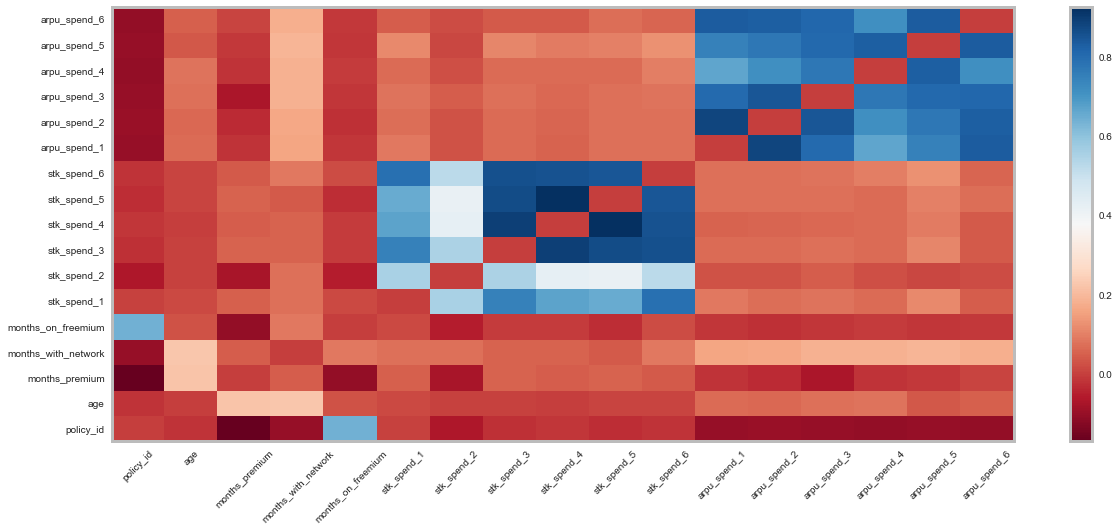

In [732]:
import sys
sys.path.append("../utils/")
from course_utils import *
import churn_analysis as churn
%matplotlib inline
reload(churn)
churn.plotCorr(customers_data, 'churned', 18, 8)

<p>The above illustration let's us quickly see which variables have high degrees of correlation amongst themselves. In particular, we see that 'stk_spend_2', 'stk_spend_3', 'stk_spend_4','stk_spend_5', 'stk_spend_6', 'arpu_spend_1', 'arpu_spend_2','arpu_spend_3', 'arpu_spend_4', 'arpu_spend_5', and 'arpu_spend_6' have alarmingly high correlation. Intuitively this might make sense, as customer who spend more on network would also be more likely to spend more insurrance. An important question of course is, does this matter? The answer of course (and this is the answer to many data science questions), is it depends. In general, we usually want to be cautious when several variables are highly correlated (and even more so if they are collinear). Certain supervised learning algorithms, such as tree-based algorithms, can automatically deal with highly correlated variables. Tree-based algorithms are particularly good at handling data 'as-is,' and one might choose to use them based on that property. However, many industrial systems are built around linear models, such as logistic regression. These algorithms are definitely sensitive to data irregularities, and can certainly give strange results when two or more features are highly correlated. <br><br>

For the purpose of this case study, we're going to assume that we don't have restrictions on our choice of supervised learning algorithm. We can thus think ahead and acknowledge that our final model may likely be tree based, and as a consequence we won't explicitly correct for the high degree of correlation present here. If we wanted to though, some possible solutions could be simply dropping one of the correlated variables, or transforming the data using Principal Components. 
</p>

### Targeted Exploration

<p>Above we looked at how the various predictor variables correlated with each other. That is an exercise with its own motivation and implications. When faced with a supervised learning task, we often also care deeply about how all of the covariates correlate with our outcome of interest. This step of exploratory analysis has several benefits.<br>
<ul>
    <li><i><u>Pre-filtering of variables:</u></i>  In many cases we want to reduce the dimensionality of the dataset prior to modeling. In general, there is no sense in keeping variables that have no relationship with the outcome.  </li>
    <li><i><u>Early insights:</u></i> We may want to report back progress to our business partners sooner than later. This step of the analysis will help us get early clues as to what are the primary drivers of churn.</li>
</ul>

Text(0.5, 1.0, 'Mutual Information Between Variable X and Churn')

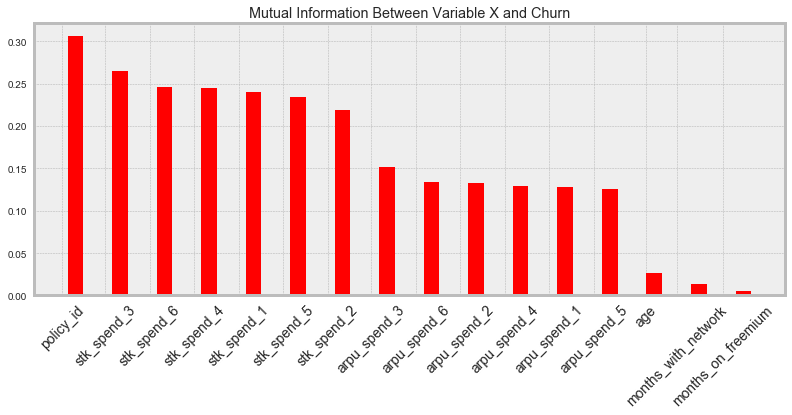

In [733]:
import sys
sys.path.append("../utils/")
from course_utils import *
import churn_analysis as churn
from course_utils import *
from churn_analysis import makeBar, makeBarSigned
import importlib
importlib.reload(churn)

customers_d = customers_data.drop(['customer_guid','months_premium','gender','name','region', 'branch'], axis=1)
churn.plotMI(customers_d, 'churned', 0.35, 0)
plt.title('Mutual Information Between Variable X and Churn')

<p>This chart makes it pretty obvious which variables have a more correlated relationship with the churn outcome. For this analysis, we can ignore the absolute value of the mutual information and focus more on the relative values. Of the 17 variables, the Age, months_on_freemium, and months_with_network look like they carry very little information about the Churn outcome. Of the remaining 14, 'months_premium' clearly is the leader by far. This is interesting, but to truly interpret this, we need to know one more piece of information - does the variable in question have a positive or negative relationship with Churn? One issue with Mutual Information is that it doesn't tell us this piece. <br><br>

With a little hacking, we can show the same plot but color the bars accoring to the direction of the correlation. 
</p>

Text(0.5, 1.0, 'Color Coded : Mutual Information Between Variable X and Churn')

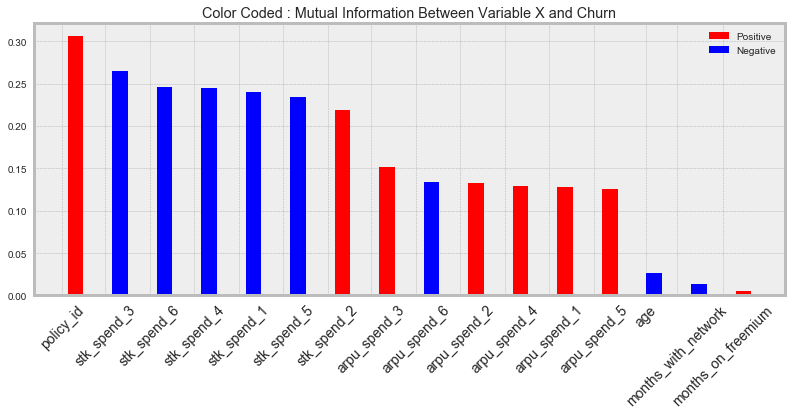

In [734]:
churn.plotMI(customers_d, 'churned', 0.35, 1)
plt.title('Color Coded : Mutual Information Between Variable X and Churn')

<p>The above chart shows Mutual Information, but with the bars colored according to the direction of the correlation. So to read this, we can say that as ''months_premium' increases, the likelihood to customers churn goes up. We'll leave it as a thought experiment for the following question: "How should we explain the qualitative implications of this chart to our investors?"
</p>

# Predictive Modeling


The general process of modeling is shown below:

![](../images/cover_overview.png)

## Approach

Our basic machine learning approach is:

1. Prepare data for machine learning
    * Fill in missing values with median imputation
    * Encoding of categorical values
2. Split data into training and hold out testing based on time 
3. Evaluate a baseline logistic regression model
    * Also try a naive baseline for comparison
4. Try a non-linear more capable classifier, the Random Forest 
    * Use mostly default hyperparameters
    * Evaluate on hold-out testing data
5. Inspect predictions to determine if business need has been met
    * Precision recall curve used to tune threshold
    * Confusion matrix to assess predictions
    * Determine business value
6. Optimizer model automatically using an auto-ml library
    * Using TPOT although many options exist
    
The final outcome is an optimized model that solves the business problem of predicting customer churn with given parameters. The model can be deployed - used to make predictions on new data

### Setup

<p>At this stage we should have a strong sense of where our data came from and what the data looks like. We know from our planning that we aim to learn a supervised model with a binary outcome. When we set up the problem, we set it up without specifying any specific constraints around the learning algorithm we can use. There are many industrial situations where one might only be able to choose from a small class of algorithms. This could be motivated by scalability concerns, legacy issues or regulatory mandates. <br><br>

This is the stage where we need to decide whether or not to act on any of the data learnings we have observed above. We know we have at least one highly redundant feature as well as three features that seem to have no relationship with our outcome. If we were constrained to using a linear model like logistic regression, we would definitely want to consider dropping these variables. We know though that we have the allowance to use many more sophisticated tree-based algorithms, which conveniently enables us to just use the data as is. Nonetheless, we'll test in this study the effect of dropping these variables. 
</p>

### Modeling Plan
<p>Building the final model is one area where we can put the 'science' in data science. Specifically, choosing a model can be thought of as running a controlled experiment against the multitude of design options that can be built into modeling process. It generally helpful to be organized and specify the exact modeling options we will test. Here is the plan for this dataset:<br><br>

<b>Modeling Design Parameters</b>
<ul>
    <li><b>Algorithms:</b> [Gradient Boosted Tree, Random Forest, Decision Tree, Logistic Regression]</li>
    <li><b>Hyper-parameters:</b> Each algorithm has its own set of applicable hyper-parameters. We'll choose a grid of parameters that makes reasonable sense for each algorithm.</li>
    <li><b>Variables:</b> All vs All</li>
</ul><br>
<b>Evaluation Plan</b><br><br>

<u><i>Splits</i></u><br>
You can't compare modeling options if you don't have a clearly articulated evaluation plan. We have a reasonably large dataset, with relatively few variables and balanced class distribution. We should consider ourselves spoiled (or at least lucky), that this is the case. The first decision we have to make is how to split the data. There is no time index, so we can just randomize across users. Because we have sufficient data, we would likely be fine creating three splits: training, validation, and testing. If we went this route, splits around 70%, 20%, 10% would likely do (remember, this particular decision is rather heuristic). 
<br><br>
We don't have any particular constraints around modeling time, and the data isn't too large, so we'll go the extra mile and run cross-validation to do modeling selection. In cross-validation, we need a train/test split, and we can go 90%/10% for this. One advantage of cross-validation is that we can get variance estimates of our validation results, which gives flexibility in designing more conservative modeling selection rules. And on a practical note, we have to make sure we use the same exact cross-validation splits for each algorithm + hyper-parameter option. 
<br><br>

<u><i>Evaluation Metric</i></u><br>
Choosing the right evaluation metric is a critical decision whose importance is often overlooked. Specifically, we get to choose the evaluation metric used in validation. The training metric, which guides the empirical risk minimization algorithm in training, is often dicated by the algorithm (and is usually different for each algorithm).
<br><br>
The right metric should be guided by the application. Our example here has two potential applications: 1). to rank candidates according to likelihood to churn, and 2). to estimate good churn probabilities. The AUC would be an appropriate metric if we were just considering case (1), but we'll choose the LogLoss because of case (2). We'll discuss later how to create an expected value framework for putting our churn model into action. Before that though, we can say that a good churn probability estimator is a key element in computing expected values, and thus we'll choose the LogLoss.<br><br>

<b>So now let's get onto the modeling!</b><br><br>

Below is the most Python that we'll show in this case study. The code does a lot in just a few lines, and it shows pretty clearly the algorithms and hyper-parameters we're going to consider.


We have a lot of string labels that we encounter in Name and Region columns.
</p>

In [735]:
customers_data['name'].unique()

array(['Riziki+Personal', 'Riziki+Family'], dtype=object)

In [736]:
customers_data['region'] = customers_data['region'].replace(0, 'Not_applicable')

In [737]:
customers_data['region'].unique()

array(['NairobiWestNorthE.', 'GreaterNairobi/Central-GeorgeNjathi',
       'GreaterNairobi/Eastern-MauriceBisungo',
       'NairobiWestU-JeriothKarweni', 'NairobiWestL-MaryMbugua',
       'NorthRift-LeonardChirchir', 'SouthNyanza-DanielGisiri',
       'Central-KelvisWaithira', 'CBD/NairobiEast-RuthKyalo',
       'FinserveHeadOffice', 'CentralRift-MichaelNdungu',
       'Cental/MtKenya', 'CentralRift/NorthRift', 'Not_applicable',
       'Coast-IsaacMwangi', 'NairobiEast-LawrenceGakuo', 'CoastRegion',
       'NairobiEast', 'Western/Nyanza', 'MtKenya-DominicKaloki',
       'Headoffice', 'NorthNyanza-Vacant'], dtype=object)

In [738]:
label_columns = ['name', 'region']

for _ in label_columns:
    print("List of unique labels {}:{}".format(_, set(customers_data[_])))

List of unique labels name:{'Riziki+Family', 'Riziki+Personal'}
List of unique labels region:{'SouthNyanza-DanielGisiri', 'NairobiWestNorthE.', 'Western/Nyanza', 'GreaterNairobi/Eastern-MauriceBisungo', 'Central-KelvisWaithira', 'Not_applicable', 'CBD/NairobiEast-RuthKyalo', 'NorthRift-LeonardChirchir', 'Coast-IsaacMwangi', 'MtKenya-DominicKaloki', 'NairobiWestL-MaryMbugua', 'Headoffice', 'CentralRift/NorthRift', 'NairobiWestU-JeriothKarweni', 'Cental/MtKenya', 'CentralRift-MichaelNdungu', 'NairobiEast', 'NairobiEast-LawrenceGakuo', 'CoastRegion', 'NorthNyanza-Vacant', 'GreaterNairobi/Central-GeorgeNjathi', 'FinserveHeadOffice'}


In [739]:
name_values = {'Riziki+Family' : 0, 'Riziki+Personal' : 1} 
region_values = {'NairobiEast-LawrenceGakuo' : 0, 'CBD/NairobiEast-RuthKyalo' : 1, 'NairobiEast' : 2, 'NorthNyanza-Vacant' : 3, 'CentralRift/NorthRift' : 4,
                 'SouthNyanza-DanielGisiri' : 5, 'Cental/MtKenya' : 6, 'NairobiWestL-MaryMbugua' : 7, 'CoastRegion' : 8, 
                 'NairobiWestU-JeriothKarweni' : 9, 'GreaterNairobi/Eastern-MauriceBisungo' : 10, 'Western/Nyanza' : 11, 
                 'GreaterNairobi/Central-GeorgeNjathi' : 12, 'CentralRift-MichaelNdungu' : 13,
                 'NairobiWestNorthE.' : 14, 'NorthRift-LeonardChirchir' : 15, 'Not_applicable' : 16, 
                 'MtKenya-DominicKaloki' : 17, 'Headoffice' : 18, 'Coast-IsaacMwangi' : 19, 'Central-KelvisWaithira' : 20, 
                 'FinserveHeadOffice' : 21}
customers_data.replace({'name': name_values, 'region': region_values}, inplace=True)

In [740]:
customers_dat = customers_data.drop(['customer_guid','months_premium','policy_id','branch'], axis=1)
customers_dat.describe()

,age,name,months_with_network,months_on_freemium,churned,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,stk_spend_5,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6
count,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000,1186.000
mean,41.517,0.673,41.931,2.593,0.622,10.027,108143.082,56717.680,132680.408,132189.697,125289.956,116760.209,279.448,309.865,293.656,260.972,263.809,253.432
std,13.242,0.469,15.312,3.330,0.485,6.605,509225.169,409238.995,620587.558,600380.154,637250.657,512996.474,897.538,860.522,679.957,632.926,697.097,758.912
min,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,32.000,0.000,30.000,0.000,0.000,3.000,82.250,0.000,887.000,289.250,60.000,102.250,2.000,10.000,20.000,10.000,2.000,0.000
50%,40.000,1.000,45.000,1.000,1.000,10.000,8025.000,1800.000,10613.500,9133.000,8619.500,9673.000,49.000,66.000,93.000,73.500,57.500,53.000
75%,50.000,1.000,56.000,4.000,1.000,17.000,40480.500,17322.500,46549.500,41825.250,41320.000,45015.500,204.000,233.750,259.000,219.000,196.000,195.000
max,120.000,1.000,61.000,14.000,1.000,21.000,8802088.000,9546431.000,9856928.000,11059673.000,13547967.000,9589190.000,18979.000,15438.000,8658.000,7179.000,8417.000,16018.000


In [741]:
customers_dat.head()

,age,gender,name,months_with_network,months_on_freemium,churned,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,stk_spend_5,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6
0,8,F,1,54.000,0,1,14,1821460.000,0.000,2636480.000,3231100.000,1866050.000,1187200.000,633.000,865.000,661.000,439.000,1415.000,1194.000
1,45,M,1,55.000,7,1,12,223050.000,0.000,11500.000,130455.000,55000.000,271263.000,5.000,9.000,4.000,12.000,21.000,11.000
2,65,M,1,49.000,8,1,10,44450.000,53770.000,69000.000,44600.000,51000.000,38150.000,39.000,20.000,29.000,30.000,8.000,32.000
3,55,F,1,29.000,8,1,9,2150.000,0.000,25550.000,92500.000,25600.000,63400.000,135.000,23.000,51.000,252.000,1.000,142.000
4,41,F,1,45.000,9,1,7,74155.000,0.000,96000.000,19800.000,49980.000,30680.000,78.000,119.000,199.000,349.000,268.000,172.000


In [742]:
customers_dat.dtypes

age                      int64
gender                  object
name                     int64
months_with_network    float64
months_on_freemium       int64
churned                  int64
region                   int64
stk_spend_1            float64
stk_spend_2            float64
stk_spend_3            float64
stk_spend_4            float64
stk_spend_5            float64
stk_spend_6            float64
arpu_spend_1           float64
arpu_spend_2           float64
arpu_spend_3           float64
arpu_spend_4           float64
arpu_spend_5           float64
arpu_spend_6           float64
dtype: object

In [743]:
customers_dat['gender'] = customers_dat['gender'].replace(0, 'Not_applicable')

In [744]:
customers_dat['gender'].value_counts()

M                 853
F                 329
Not_applicable      4
Name: gender, dtype: int64

In [745]:
customers_dat['gender'].unique()

array(['F', 'M', 'Not_applicable'], dtype=object)

In [746]:
# For each categorical column
# We fit a label encoder, transform our column and 
# add it to our new dataframe
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from numpy import argmax
from sklearn import preprocessing
customers_dat['gender'] = customers_dat['gender'].astype(str)
print(customers_dat['gender'].unique())
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder(sparse=False)
    enc_cat_feature = enc_cat_feature.reshape(len(enc_cat_feature), 1)
    encoded = ohe.fit(enc_cat_feature)
    return encoded.transform(enc_cat_feature)


categorical_columns= ['gender']

for col in categorical_columns:
    temp = encode_string(customers_dat[col])
    Features_gender = np.concatenate([temp], axis = 1)
#explorer categorical (bool) columns
enc_co_gender = ['Gender_Not_Specified','Female','Male']
print(Features_gender.shape)
print(Features_gender[:10, :])

['F' 'M' 'Not_applicable']
(1186, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [747]:
# To see and get number columns
category_num_cols_logs =(customers_dat.dtypes == float) | (customers_dat.dtypes==np.int64)
raw_category_num_cols_logs = [c for c in category_num_cols_logs.index if category_num_cols_logs[c]]
raw_category_num_cols_logs

['age',
 'name',
 'months_with_network',
 'months_on_freemium',
 'churned',
 'region',
 'stk_spend_1',
 'stk_spend_2',
 'stk_spend_3',
 'stk_spend_4',
 'stk_spend_5',
 'stk_spend_6',
 'arpu_spend_1',
 'arpu_spend_2',
 'arpu_spend_3',
 'arpu_spend_4',
 'arpu_spend_5',
 'arpu_spend_6']

In [748]:
# for z in raw_category_num_cols_logs:
#     print(customers_dat[z].name,':',customers_dat[z].unique())

In [749]:
Features_gender

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [750]:
gender_cols = raw_category_num_cols_logs + enc_co_gender
customers_enc= np.concatenate([customers_dat[raw_category_num_cols_logs],Features_gender],axis=1)
customers_enc = pd.DataFrame(customers_enc, columns=gender_cols)
customers_enc.head()

,age,name,months_with_network,months_on_freemium,churned,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,...,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6,Gender_Not_Specified,Female,Male
0,8.000,1.000,54.000,0.000,1.000,14.000,1821460.000,0.000,2636480.000,3231100.000,...,1187200.000,633.000,865.000,661.000,439.000,1415.000,1194.000,1.000,0.000,0.000
1,45.000,1.000,55.000,7.000,1.000,12.000,223050.000,0.000,11500.000,130455.000,...,271263.000,5.000,9.000,4.000,12.000,21.000,11.000,0.000,1.000,0.000
2,65.000,1.000,49.000,8.000,1.000,10.000,44450.000,53770.000,69000.000,44600.000,...,38150.000,39.000,20.000,29.000,30.000,8.000,32.000,0.000,1.000,0.000
3,55.000,1.000,29.000,8.000,1.000,9.000,2150.000,0.000,25550.000,92500.000,...,63400.000,135.000,23.000,51.000,252.000,1.000,142.000,1.000,0.000,0.000
4,41.000,1.000,45.000,9.000,1.000,7.000,74155.000,0.000,96000.000,19800.000,...,30680.000,78.000,119.000,199.000,349.000,268.000,172.000,1.000,0.000,0.000


In [751]:
print(np.any(np.isfinite(customers_enc)))

True


In [752]:
customers_enc = customers_enc.astype('int64')
customers_enc.dtypes

age                     int64
name                    int64
months_with_network     int64
months_on_freemium      int64
churned                 int64
region                  int64
stk_spend_1             int64
stk_spend_2             int64
stk_spend_3             int64
stk_spend_4             int64
stk_spend_5             int64
stk_spend_6             int64
arpu_spend_1            int64
arpu_spend_2            int64
arpu_spend_3            int64
arpu_spend_4            int64
arpu_spend_5            int64
arpu_spend_6            int64
Gender_Not_Specified    int64
Female                  int64
Male                    int64
dtype: object

In [753]:
customers_enc.head()

,age,name,months_with_network,months_on_freemium,churned,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,...,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6,Gender_Not_Specified,Female,Male
0,8,1,54,0,1,14,1821460,0,2636480,3231100,...,1187200,633,865,661,439,1415,1194,1,0,0
1,45,1,55,7,1,12,223050,0,11500,130455,...,271263,5,9,4,12,21,11,0,1,0
2,65,1,49,8,1,10,44450,53770,69000,44600,...,38150,39,20,29,30,8,32,0,1,0
3,55,1,29,8,1,9,2150,0,25550,92500,...,63400,135,23,51,252,1,142,1,0,0
4,41,1,45,9,1,7,74155,0,96000,19800,...,30680,78,119,199,349,268,172,1,0,0


In [754]:
# Create binary features to check if the example is has missing values for all features that have missing values
for feature in customers_enc.columns:
    if np.any(np.isnan(customers_enc[feature])):
        customers_enc["is_" + feature + "_missing"] = np.isnan(customers_enc[feature]) * 1

customers_enc.head()

,age,name,months_with_network,months_on_freemium,churned,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,...,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6,Gender_Not_Specified,Female,Male
0,8,1,54,0,1,14,1821460,0,2636480,3231100,...,1187200,633,865,661,439,1415,1194,1,0,0
1,45,1,55,7,1,12,223050,0,11500,130455,...,271263,5,9,4,12,21,11,0,1,0
2,65,1,49,8,1,10,44450,53770,69000,44600,...,38150,39,20,29,30,8,32,0,1,0
3,55,1,29,8,1,9,2150,0,25550,92500,...,63400,135,23,51,252,1,142,1,0,0
4,41,1,45,9,1,7,74155,0,96000,19800,...,30680,78,119,199,349,268,172,1,0,0


In [755]:
for _ in customers_enc.columns:
    print("The number of null values in:{} == {}".format(_, customers_enc[_].isnull().sum()))

The number of null values in:age == 0
The number of null values in:name == 0
The number of null values in:months_with_network == 0
The number of null values in:months_on_freemium == 0
The number of null values in:churned == 0
The number of null values in:region == 0
The number of null values in:stk_spend_1 == 0
The number of null values in:stk_spend_2 == 0
The number of null values in:stk_spend_3 == 0
The number of null values in:stk_spend_4 == 0
The number of null values in:stk_spend_5 == 0
The number of null values in:stk_spend_6 == 0
The number of null values in:arpu_spend_1 == 0
The number of null values in:arpu_spend_2 == 0
The number of null values in:arpu_spend_3 == 0
The number of null values in:arpu_spend_4 == 0
The number of null values in:arpu_spend_5 == 0
The number of null values in:arpu_spend_6 == 0
The number of null values in:Gender_Not_Specified == 0
The number of null values in:Female == 0
The number of null values in:Male == 0


In [756]:
customers_enc.shape

(1186, 21)

In [757]:
cols = customers_enc.columns.tolist()
print(cols)
customers_enc.to_csv(r'../data/customers_data_clean.csv',index=False)

['age', 'name', 'months_with_network', 'months_on_freemium', 'churned', 'region', 'stk_spend_1', 'stk_spend_2', 'stk_spend_3', 'stk_spend_4', 'stk_spend_5', 'stk_spend_6', 'arpu_spend_1', 'arpu_spend_2', 'arpu_spend_3', 'arpu_spend_4', 'arpu_spend_5', 'arpu_spend_6', 'Gender_Not_Specified', 'Female', 'Male']


In [758]:
test = customers_enc.drop(['churned'], axis = 1)
test.to_csv(r'../data/customers_test_data_clean.csv',index=False)
test.columns

Index(['age', 'name', 'months_with_network', 'months_on_freemium', 'region',
       'stk_spend_1', 'stk_spend_2', 'stk_spend_3', 'stk_spend_4',
       'stk_spend_5', 'stk_spend_6', 'arpu_spend_1', 'arpu_spend_2',
       'arpu_spend_3', 'arpu_spend_4', 'arpu_spend_5', 'arpu_spend_6',
       'Gender_Not_Specified', 'Female', 'Male'],
      dtype='object')

###  Pipelines for Deplotment
We'll create a custom pre-processing estimator that would help us in writing better pipelines and in future deployments:

In [759]:
#Here is the grid of hyper-parameters will test for each algorithm
import os
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
# Fundamental librarys to math and stats process
import numpy.random as nr
import scipy.stats as ss
import math
# import fancyimpute
from collections import Counter
import time
import pickle
import xgboost as xgb
import seaborn as sns
import category_encoders as ce
#from mlens.visualization import corrmat
from xgboost import XGBClassifier, XGBRegressor
from keras import models, layers, optimizers
# ML preprocessing and ML algorithms models
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as ms
from sklearn.pipeline import make_pipeline
from sklearn import feature_selection as fs
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, Normalizer, MinMaxScaler, FunctionTransformer, PolynomialFeatures, \
    Imputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
# ML Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, \
    cross_validate, train_test_split
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer, StandardScaler
# ML sklearn  algorithms models
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as sklm
from sklearn.metrics import (roc_auc_score, confusion_matrix, classification_report,accuracy_score, roc_curve, auc,
                             precision_recall_curve, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsemble
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import mean_squared_error
import catboost as cat
from sklearn.base import BaseEstimator, TransformerMixin
import json
import requests


get_ipython().magic('matplotlib inline')
plt.ion
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))  # Limiting floats output to 3 decimal points
import warnings

warnings.filterwarnings('ignore')
nr.seed(3456)
rng = np.random.RandomState(31337)


class PreProcessing(BaseEstimator, TransformerMixin):
    """Custom Pre-Processing estimator for our use-case
    """

    def __init__(self):
        pass


    def data_pre_processing(self):
        df = pd.read_csv(r"../data/customers_data_clean.csv")
        #df = df.drop(['Unnamed: 0'], axis=1)
        # split into X and y
        df_X = df.drop(['churned'], axis=1)
        # Convert to numpy array
        X = np.array(df_X)
        # Labels are the values we want to predict
        y = df['churned']
        # Use numpy to convert to arrays
        y = np.array(y)
        # instantiate an encoder - here we use Binary()
        return df_X, X, y


    def data_processor(self, X, y):
        print("Train Test Split ratio is 0.3")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=54321)
        return X_train, X_test, y_train, y_test


    def best_festure(self, X, y):
        #df = df.drop(['Unnamed: 0'], axis=1)
        bestfeatures = fs.SelectKBest(score_func=fs.f_classif, k=20)
        fit = bestfeatures.fit(X, y)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(df.columns)
        # concat two dataframes for better visualization
        featureScores = pd.concat([dfcolumns, dfscores], axis=1)
        featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
        print(featureScores.nlargest(14, 'Score'))  # print 10 best features


    def getbaseline(self, X_train, X_test, y_train, y_test):
        """
        We first fit a decision tree with default parameters to get a baseline idea of the performance
        """
        decisiontree = DecisionTreeClassifier()
        decisiontree.fit(X_train, y_train)
        y_pred = decisiontree.predict(X_test)
        y_pred_proba = decisiontree.predict_proba(X_test)[:, 1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print("Decision Tree Accuracy Score: ", decisiontree.score(X_test, y_test))
        print("Decision Tree F1 score is: {}".format(f1_score(y_test, y_pred)))
        print("Decision Tree AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
        print("Decision Tree ROC_AUC Score is: {}".format(roc_auc))


    def plot_baseline(self, X_train, X_test, y_train, y_test):
        # https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
        max_depths = np.linspace(1, 16, 16, endpoint=True)
        train_results = []
        test_results = []
        for max_depth in max_depths:
            decisiontree = DecisionTreeClassifier(max_depth=max_depth)
            decisiontree.fit(X_train, y_train)
            train_pred = decisiontree.predict(X_train)
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
            roc_auc = auc(false_positive_rate, true_positive_rate)
            # Add auc score to previous train results
            train_results.append(roc_auc)
            y_pred = decisiontree.predict(X_test)
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
            roc_auc = auc(false_positive_rate, true_positive_rate)
            # Add auc score to previous test results
            test_results.append(roc_auc)
        line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
        line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
        plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
        plt.ylabel('AUC score')
        plt.xlabel('Tree depth')
        plt.show()


    def random_forest_classifier(self, X, y):
        print("Random forest binary classification")
        # Build random forest classifier (same config)
        kf = KFold(n_splits=2, shuffle=True, random_state=rng)
        for train_index, test_index in kf.split(X):
            rf_clf = RandomForestClassifier().fit(X[train_index], y[train_index])
            # make predictions for test data
            predictions = rf_clf.predict(X[test_index])
            actuals = y[test_index]
            predictions = [round(value) for value in predictions]
            # evaluate predictions
            accuracy = accuracy_score(actuals, predictions)
            print("Accuracy: %.2f%%" % (accuracy * 100.0))
            print('Confusion Matrix :')
            #Confusion Matrix
            mat = confusion_matrix(actuals, predictions)
            print(mat)
            sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['No','Yes'], yticklabels=['No','Yes'] )
            plt.xlabel('true label')
            plt.ylabel('predicted label')
            # evaluate predictions
            # accuracy = accuracy_score(y_test, catpred)
            print('F-Score')
            f_score = f1_score(actuals, predictions)
            print(f_score)
            print('Report : ')
            print(classification_report(actuals, predictions))

        nr.seed(3456)
        # Define the dictionary for the grid search and the model object to search on
        param_grid_Forest = {"n_estimators": [500, 1000],
                             'max_features': [6, 8, 12],
                             'max_depth': [2, 4, 6]}

        # Perform the grid search over the parameters

        Grid_Forest = ms.GridSearchCV(estimator=rf_clf, param_grid=param_grid_Forest, verbose=1)

        # 'max_depth': [2,4,6],'n_estimators': [5,3,8],'learning_rate': [0.1,0.01],
        Grid_Forest.fit(X, y)
        print("Test set score: {:.2f}".format(Grid_Forest.best_score_))
        print("Best parameters: {}".format(Grid_Forest.best_params_))
        # Save the model into disk 
        print("Save the model into disk")
        pickle.dump (rf_clf,open (r"../data/rf_clf.pkl", "wb"))
         # Load the random forest model back 
        print("Load the random forest model back ")
        random_forest = pickle.load(open(r"../data/rf_clf.pkl","rb"))
        # Use it 
        print(classification_report(actuals, predictions))
    

    def plot_precision_recall(self, test_y, probs, title='Precision Recall Curve', threshold_selected=None):
        """Plot a precision recall curve for predictions. 
           Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py"""

        precision, recall, threshold = precision_recall_curve(test_y, probs)
        plt.figure(figsize=(10, 8))
        # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
        step_kwargs = ({'step': 'post'})
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

        plt.xlabel('Recall', size=18)
        plt.ylabel('Precision', size=18)
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title(title, size=20)
        plt.xticks(size=14)
        plt.yticks(size=14)

        if threshold_selected:
            p = precision(np.where(threshold == threshold_selected)[0])
            r = recall(np.where(threshold == threshold_selected)[0])
            plt.scatter(r, p, marker='*', size=200)
            plt.vlines(r, ymin=0, ymax=p, linestyles='--')
            plt.hlines(p, xmin=0, xmax=r, linestyles='--')

        pr = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1],
                           'threshold': threshold})
        return pr
    
    def updated_plot_precision_recall(self, test_y, probs, title='Precision Recall Curve', threshold_selected=None):
        """Plot a precision recall curve for predictions. 
           Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py"""

        precision, recall, threshold = precision_recall_curve(test_y, probs)
        plt.figure(figsize=(10, 10))
        # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
        step_kwargs = ({'step': 'post'})
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

        plt.xlabel('Recall', size=24)
        plt.ylabel('Precision', size=24)
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title(title, size=24)
        plt.xticks(size=18)
        plt.yticks(size=18)

        if threshold_selected:
            p = precision[np.where(threshold == threshold_selected)[0]]
            r = recall[np.where(threshold == threshold_selected)[0]]
            plt.scatter(r, p, marker='*', s=600, c='r')
            plt.vlines(r, ymin=0, ymax=p, linestyles='--')
            plt.hlines(p, xmin=0, xmax=r, linestyles='--')
            plt.text(r - 0.1, p + 0.15,
                     s=f'Threshold: {round(threshold_selected, 2)}', size=20, fontdict={'weight': 1000})
            plt.text(r - 0.2, p + 0.075,
                     s=f'Precision: {round(100 * p[0], 2)}% Recall: {round(100 * r[0], 2)}%', size=20,
                     fontdict={'weight': 1000})

        pr = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1],
                           'threshold': threshold})
        return pr

    def plot_confusion_matrix(self, cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.YlOrRd):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)
        plt.style.use('bmh')
        plt.figure(figsize=(9, 9))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, size=22)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size=20)
        plt.yticks(tick_marks, classes, size=20)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     size=20)
        plt.grid(None)
        plt.ylabel('True label', size=22)
        plt.xlabel('Predicted label', size=22)
        plt.tight_layout()


    def randomForest(self, X_train, X_test, y_train, y_test):
        """
        F1 score is: 0.7857142857142857
        AUC Score is: 0.9450972761670293
        """
        print("Start of Random forest")
        # parameters = {'n_estimators': [10, 20, 30, 50], 'max_depth': [2, 3, 4]}
        # Drop generated binary features
        rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6,
                               min_samples_leaf=50,
                               max_features=0.25,
                               criterion="entropy",
                               n_jobs=-1, class_weight='balanced',
                               random_state=50)
        
        # clf = GridSearchCV(alg, parameters, n_jobs=4)
        rf_clf.fit(X_train, y_train)
        y_pred = rf_clf.predict(X_test)
        y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
        print("\nevaluate predictions")
        print("Random Forest F1 score is: {}".format(f1_score(y_test, y_pred)))
        print("Random Forest AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))
        # evaluate predictions
        accuracy = accuracy_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred_proba)
        f_score = f1_score(y_test, y_pred)
        print("Random Forest Accuracy score : %.2f%%" % (accuracy * 100.0))
        print("Random Forest AUC Score is : %.2f%%" % (roc * 100.0))
        print("Random Forest F1 Score : %.2f%%" % (f_score * 100.0))
        print()
        #Confusion Matrix
        print('Confusion Matrix :')
        conv_mat = confusion_matrix(y_test, y_pred)
        print()
        print(conv_mat)
        sns.heatmap(conv_mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['No','Yes'], yticklabels=['No','Yes'] )
        plt.xlabel('true label')
        plt.ylabel('predicted label')
        print('Report : ')
        print(classification_report(y_test, y_pred))
        print(mean_squared_error(y_test, y_pred))
       
        
    
    def evaluate(self, model, train, y, test, test_y):
        """Evaluate a machine learning model on four metrics:
           ROC AUC, precision score, recall score, and f1 score.

           Returns the model and the predictions."""

        model.fit(train, y)

        # Predict probabilities and labels
        probs = model.predict_proba(test)[:, 1]
        preds = model.predict(test)

        # Calculate ROC AUC
        roc = roc_auc_score(test_y, probs)
        name = repr(model).split('(')[0]
        print()
        print(f"{name}\n")
        print(f'ROC AUC: {round(roc, 4)}')

        # Iterate through metrics
        for metric in [precision_score, recall_score, f1_score]:
            # Use .__name__ attribute to list metric
            print(f'{metric.__name__}: {round(metric(test_y, preds), 4)}')

        return model, preds

    # Prepare Categorical Variables
    def column_index(df, query_cols):
        cols = df.columns.values
        sidx = np.argsort(cols)
        return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]
    df = pd.read_csv(r"../data/customers_data_clean.csv")
    X = df.drop('churned', axis = 1)  #df[df.columns[:-1].tolist()]
    #print(X.head())
    cate = X.columns.tolist() #categorical[:-1]
    #print(column_index(X,cate))
    categorical_features_pos = column_index(X,cate)

    def cat_boost():
        print("Start of Cat boost")
        X, y = data_pre_processing()
        X_train, X_test, y_train, y_test = data_processor()
        eval_set = [(X_test, y_test)]
        cb_model = CatBoostClassifier(iterations=1375,
                                     learning_rate=0.109499,
                                     depth=6,
                                     thread_count = 10,
                                     eval_metric='AUC',
                                     bagging_temperature = 0.9,
                                     od_type='Iter',
                                     metric_period = 75,
                                     loss_function= 'Logloss',
                                     od_wait=100)
        cb_model.fit(X_train, y_train,
                     eval_set=eval_set,
                     cat_features = categorical_features_pos,
                     verbose=True)
        print("Model Evaluation Stage")
        print(cb_model.get_params())
        print("\nevaluate predictions")
        catpred = cb_model.predict(X_test)
        # evaluate predictions
        accuracy = accuracy_score(y_test, catpred)
        f_score = f1_score(y_test, catpred)
        print("Accuracy : %.2f%%" % (accuracy * 100.0))
        print("F1 Score : %.2f%%" % (f_score * 100.0))
        print('Confusion Matrix :')
        print(confusion_matrix(y_test, catpred))
        print('Report : ')
        print(classification_report(y_test, catpred))
        print(mean_squared_error(y_test, catpred))
        print("End of Cat boost")


In [760]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
preprocess = PreProcessing()
df_X, X, y = preprocess.data_pre_processing()
X_train, X_test, y_train, y_test = preprocess.data_processor(X, y)
# print(df_X.columns.sort_values('importance', ascending=False))
print(df_X.columns)

Train Test Split ratio is 0.3
Index(['age', 'name', 'months_with_network', 'months_on_freemium', 'region',
       'stk_spend_1', 'stk_spend_2', 'stk_spend_3', 'stk_spend_4',
       'stk_spend_5', 'stk_spend_6', 'arpu_spend_1', 'arpu_spend_2',
       'arpu_spend_3', 'arpu_spend_4', 'arpu_spend_5', 'arpu_spend_6',
       'Gender_Not_Specified', 'Female', 'Male'],
      dtype='object')


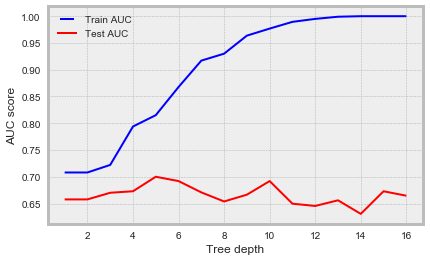

In [761]:
preprocess.plot_baseline(X_train, X_test, y_train, y_test)

# Naive Baseline

For a naive baseline, we can randomly guess that a customer has churned with the same frequence of the churns in the training data. We'll assess the predictions using a number of different metrics.

## Metrics

For an imbalanced classification problem, there are a number of metrics to consider:

* Receiver Operating Characteristic Area Under the Curve (ROC AUC): a measure between 0 and 1 comparing the performance of the classifier when predicting probabilities across a range of thresholds.
* Precision Score: number of true positives divided by the total number of positives predicted
* Recall Score: number of true positives divided by the total number of actual positives in the data
* F1 Score: Harmonic mean of precision and recall

The exact metric used and the threshold that our model needs to reach depends on the business need. We can tune the model to some extent to optimize for different metrics.

In [762]:
# Note  y_train = y
# y_test = test_y

np.random.seed(50)
naive_guess = np.random.binomial(1, p=np.mean(y_train), size=len(y_test))
naive_guess[:10], naive_guess.sum()

(array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1]), 224)

In [763]:
from sklearn.metrics import (roc_auc_score, precision_score,
                             recall_score, f1_score)

print(f'Naive Baseline\n')
roc = roc_auc_score(y_test, np.repeat(np.mean(y_train), len(y_test)))
print(f'ROC AUC: {round(roc, 4)}')

for metric in [precision_score, recall_score, f1_score]:
    print(f'{metric.__name__}: {round(metric(y_test, naive_guess), 4)}')

Naive Baseline

ROC AUC: 0.5
precision_score: 0.6964
recall_score: 0.6555
f1_score: 0.6753


In [764]:
preprocess.getbaseline(X_train, X_test, y_train, y_test)

Decision Tree Accuracy Score:  0.651685393258427
Decision Tree F1 score is: 0.7232142857142857
Decision Tree AUC Score is: 0.6369463039453069
Decision Tree ROC_AUC Score is: 0.6369463039453069


In [765]:
print(f'The percentage of churns is {100 * round(np.mean(y_train), 4)}% in the training data.')

The percentage of churns is 60.24% in the training data.


# Machine Learning

Now we need to see if machine learning is up to the task of improving on these predictions. We'll start simple, using a linear model to assess if this problem is easy enough to be solved with Logistic Regression. 

(The machine learning models are implemented in [Scikit-Learn](https://sklearn.org/)). 

## Baseline Model

We can use a logistic regression in order to see baseline performance on this problem. If the logistic regression works well enough, then there is no need to move to a more complex model.

We can write a simple function to evaluate predictions. This implements the metrics used above. (A full list of metrics in Scikit-Learn can be found in [this documentation](http://scikit-learn.org/stable/modules/classes.html))

In [766]:
logistic_model = LogisticRegression(random_state=50)
logistic_model, preds = preprocess.evaluate(logistic_model, X_train, y_train, X_test, y_test)


LogisticRegression

ROC AUC: 0.6841
precision_score: 0.7326
recall_score: 0.8866
f1_score: 0.8023


## More Complex Model

For a potentially better machine learning model, we can move to the [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). From the results of the logistic regression, this looks to be a non-linear problem which means we should use a model capable of learning a non-linear decision boundary.

We'll use most of the default hyperparameters but alter a few to prevent overfitting. We can also set `class_weight = 'balanced'` to try and offset the impact of such an imbalanced classification problem.

In [767]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6,
                               min_samples_leaf=50,
                               max_features=0.25,
                               criterion="entropy",
                               n_jobs=-1, class_weight='balanced',
                               random_state=50)
rf_clf, preds = preprocess.evaluate(rf_clf, X_train, y_train, X_test, y_test)


RandomForestClassifier

ROC AUC: 0.7919
precision_score: 0.8257
recall_score: 0.7563
f1_score: 0.7895


Start of Random forest

evaluate predictions
Random Forest F1 score is: 0.7894736842105264
Random Forest AUC Score is: 0.7918743768693918
Random Forest Accuracy score : 73.03%
Random Forest AUC Score is : 79.19%
Random Forest F1 Score : 78.95%

Confusion Matrix :

[[ 80  38]
 [ 58 180]]
Report : 
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       118
           1       0.83      0.76      0.79       238

   micro avg       0.73      0.73      0.73       356
   macro avg       0.70      0.72      0.71       356
weighted avg       0.74      0.73      0.73       356

0.2696629213483146


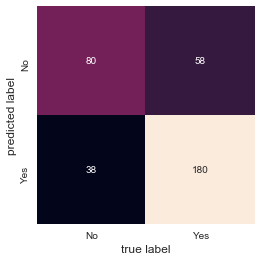

In [768]:
# fit RF to plot feature importances
# Build random forest classifier
preprocess.randomForest(X_train, X_test, y_train, y_test)
# random_forest_classifier = preprocess.random_forest_classifier()

The random forest performance is much better than just guessing! With no tuning, the model is able to identify 36% of the customer churns and the false positives have been reduced. This should give us confidence that we can solve this problem using machine learning.

## Evaluation

<p>We discussed above that our core metric here will be LogLoss. This worked well for model selection, however, simply looking at the value of the LogLoss metric without any reference points isn't always helpful. Our main motivation for using LogLoss was that we ultimately want good estimates of churn probabilities. One tool for understanding how well we achieved this goal is the probability calibration plot. Our evaluation plan will be to start with calibration plots. For additional insight into our model capabilities, we'll also produce a lift chart. The lift chart is a good evaluation tool that is fairly accessible to non data scientists. </p>

## Model Validation

We need to inspect the model results to determine if it meets our business needs. This includes looking at the performance as well as the feature importances. We want to make sure that our model performs well, but also try and understand _why_ it performs well. 

### Precision Recall Curve

One of the best methods for tuning a model for a business need is through the precision recall curve. This shows the precision-recall tradeoff for different thresholds. Depending on the business requirement, we can change the threshold for classifying a positive example to alter the balance of true positives, false positives, false negatives, and true negatives. There will always be a tradeoff between precision and recall, but we can try to find the right balance by visually and quantitatively assessing the model.

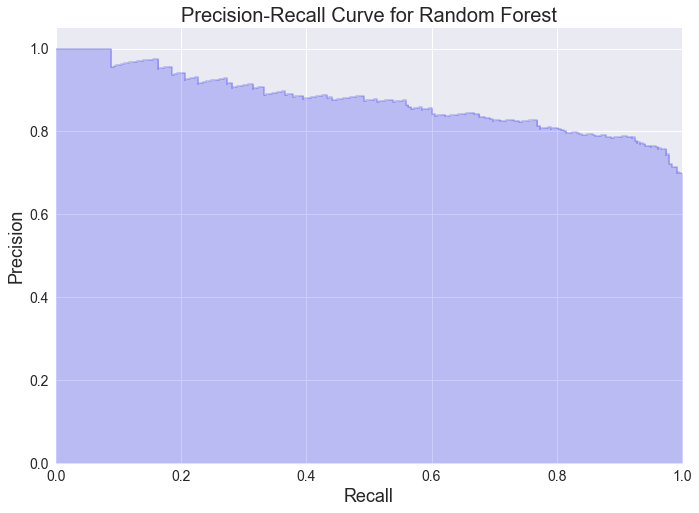

In [664]:
from sklearn.metrics import precision_recall_curve, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

# X_train, y_train, X_test, y_test
probs = rf_clf.predict_proba(X_test)[:, 1]
pr_data = preprocess.plot_precision_recall(y_test, probs, title='Precision-Recall Curve for Random Forest')

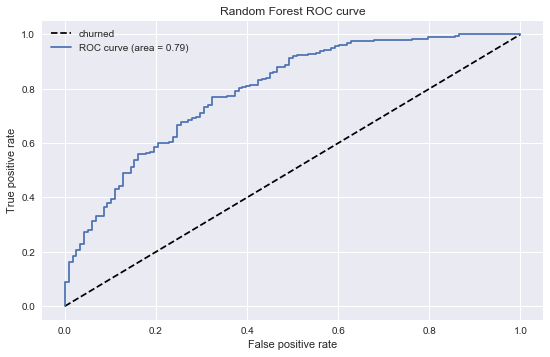

In [665]:
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='churned')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')

We can query the dataframe to find the threshold required for a given precision or recall. For example, to find the threshold for a precision of 80%, we use the following code:

In [666]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.8].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

,precision,recall,threshold
98,0.802,0.815,0.468
99,0.801,0.811,0.473
100,0.804,0.811,0.474
101,0.803,0.807,0.474
102,0.807,0.807,0.477


We can see that if we want a precision of 25%, then our recall will be 100%. This means we'll miss over 80% of the true churns in the data.

### Adjusting for the Business Requirement

Let's say we are required to have a recall of 75% in our model. This means our model finds 75% of the true churns in the data. We'll work through the rest of this notebook under this assumption. To find the threshold, we use:

In [667]:
recall_attained = 0.815
recall_above = pr_data.loc[pr_data['recall'] >= recall_attained].copy()
recall_above.sort_values('precision', ascending=False, inplace=True)
recall_above.head()

,precision,recall,threshold
98,0.802,0.815,0.468
92,0.798,0.832,0.458
97,0.798,0.815,0.464
93,0.798,0.828,0.459
94,0.797,0.824,0.460


In [668]:
precision_attained = recall_above.iloc[0, 0]
threshold_required = recall_above.iloc[0, -1]

print(f'At a threshold of {round(threshold_required, 4)} the recall is {100 * recall_attained:.2f}% and the precision is {round(100 * precision_attained, 4)}%')

At a threshold of 0.4677 the recall is 81.50% and the precision is 80.1653%


This means that in order to identify 82% of the actual churns, we'll have to accept that only 80.2% of the predicted positives are actually positive churns. 

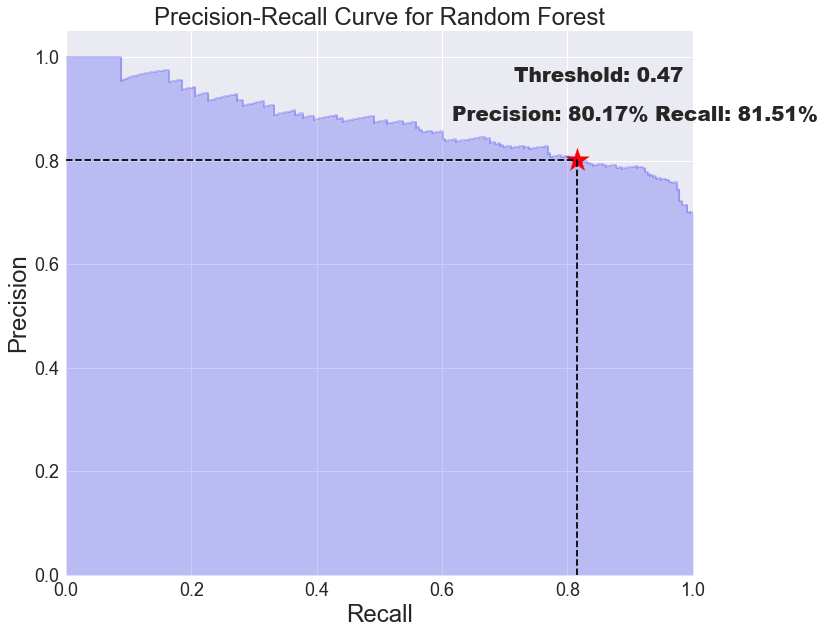

In [669]:
pr_data = preprocess.updated_plot_precision_recall(y_test, probs, title='Precision-Recall Curve for Random Forest', threshold_selected=threshold_required)

## Confusion Matrix

A confusion matrix is often a useful way to visualize predictions. This shows the true values along the top row and the predicted values along the bottom row. Looking at the different cells, we can see where the model performed well and where it did not do so well.

We'll use the threshold identified above to construct the confusion matrix.

Confusion matrix, without normalization
[[ 70  48]
 [ 44 194]]


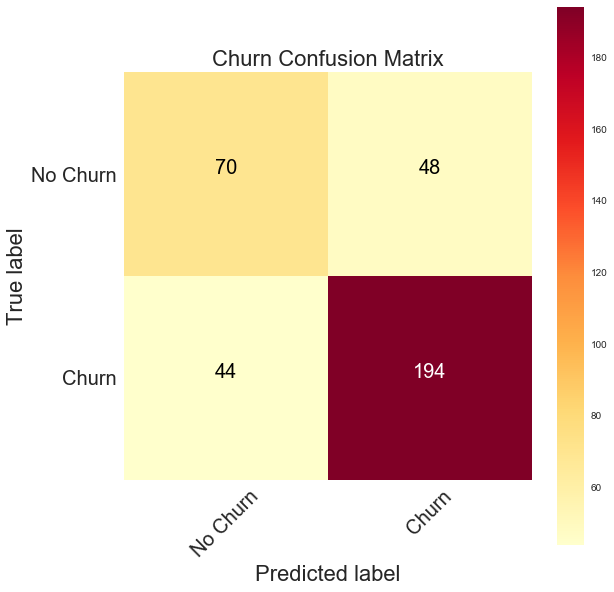

In [670]:
import itertools
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
preprocess.plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],title='Churn Confusion Matrix')

If we satisfy our business requirement, this is the best prediction of what our performance would be on new data. The model is able to identiy 75% of churned customers compared to a baseline of around 3%. The precision has increased from the baseline 1% to 8%, a relative increase of over 80%.

### Feature Importances

As one method for trying to understand how the model makes decisions, we can look at the most important features. The absolute value of the importances is not as useful as is the relative ranking of the features which is determined by how well the feature separates the classes when building the decision trees in the random forest.

In [671]:
fi = pd.DataFrame({'importance': rf_clf.feature_importances_}, index=df_X.columns).\
    sort_values('importance', ascending=False)
fi.head(10)

,importance
stk_spend_2,0.333
stk_spend_3,0.112
stk_spend_6,0.097
age,0.096
arpu_spend_3,0.093
stk_spend_1,0.068
arpu_spend_2,0.057
arpu_spend_6,0.045
stk_spend_5,0.020
stk_spend_4,0.016


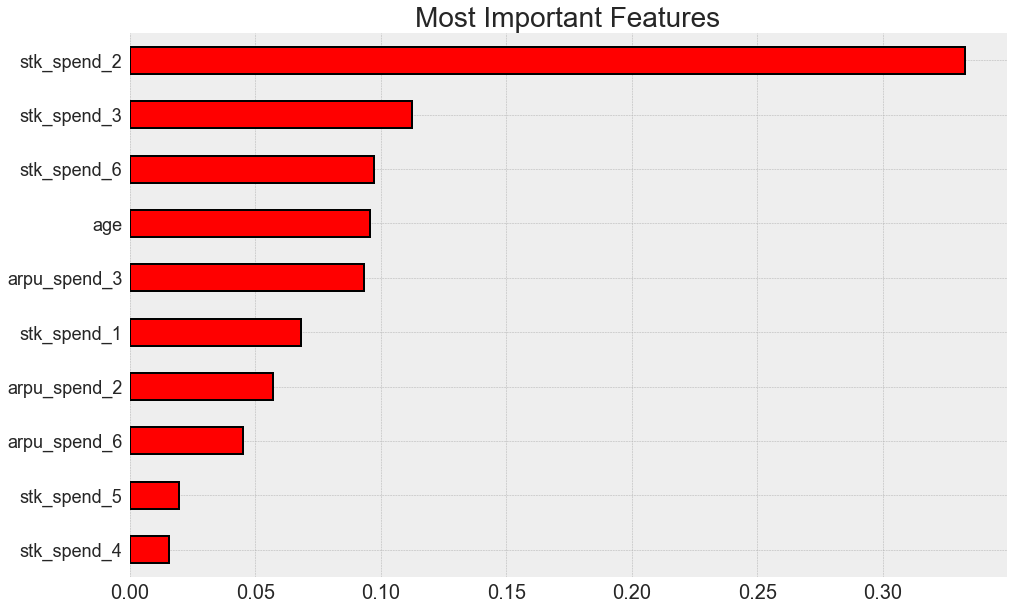

In [672]:
fi.iloc[:10]['importance'].plot.barh(color='r', edgecolor='k',figsize=(14, 10), linewidth=2)
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(size=20)
plt.yticks(size=18)
plt.title('Most Important Features', size=28);

To see why these features are important, we can plot the distribution colored by the value of the label.
We'll look at both a kernel density estimate plot and an empirical cumulative distribution frequency diagram.

In [673]:
# Inspiration: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12
def ecdf(x):
    n = len(x)
    x = np.sort(x)
    y = np.arange(1, n + 1) / n
    return x, y

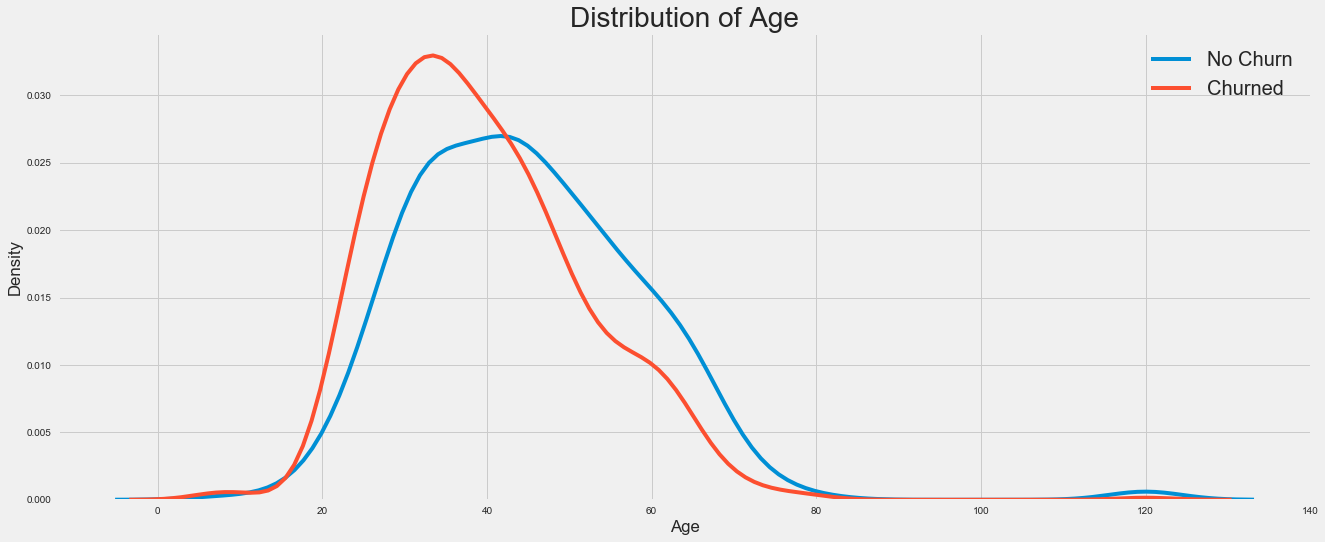

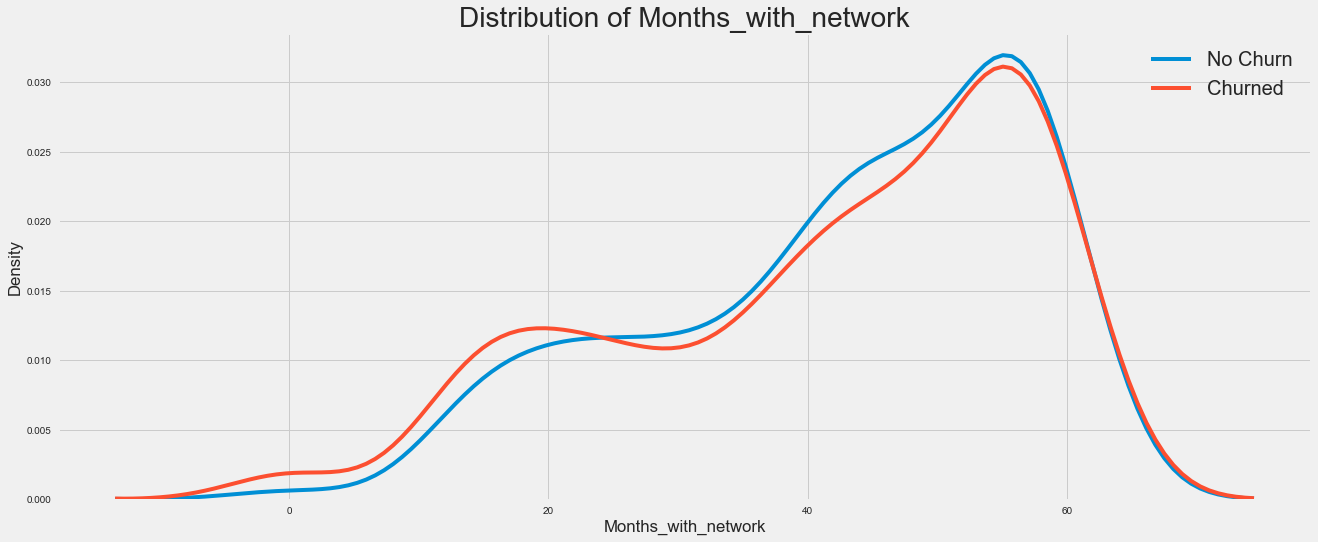

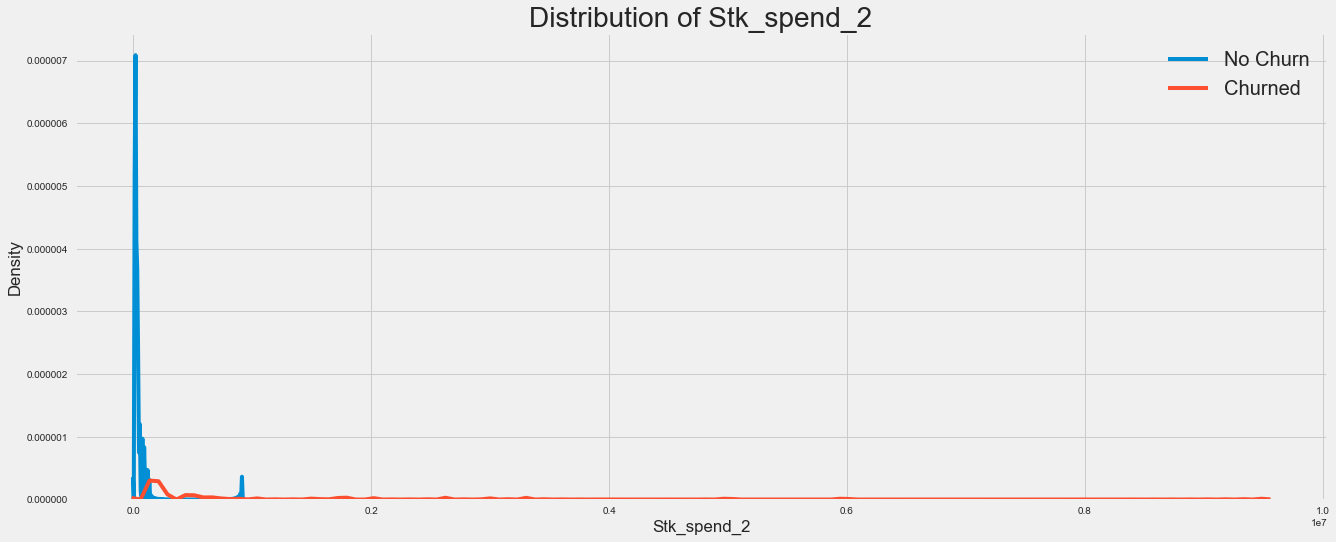

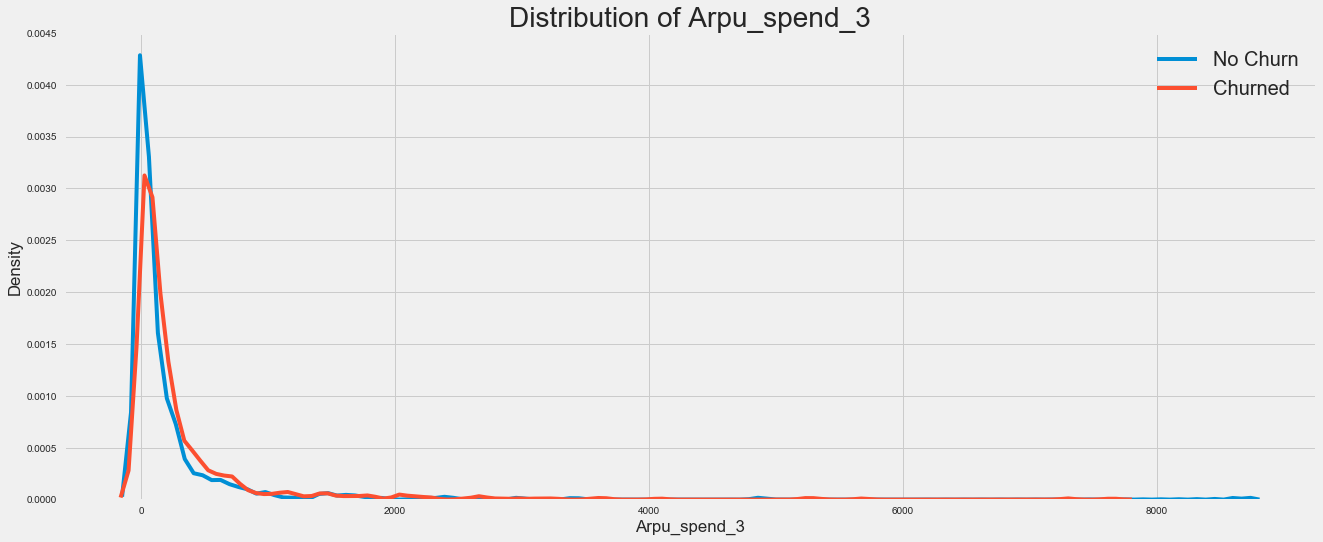

In [674]:
import seaborn as sns
plt.style.use('fivethirtyeight')

train_with_labels = df_X.copy()
train_with_labels['churned'] = y

# Iterate through features
for feature in ['age', 'months_with_network','stk_spend_2', 'arpu_spend_3']:
    plt.figure(figsize=(20, 8))

    # Iterate through values of the label
    for label, grouped in train_with_labels.groupby('churned'):
        # Plot the distribution of the feature
        sns.kdeplot(grouped[feature].dropna(),
                    label='Churned' if label == 1 else 'No Churn')
    # Plot labeling
    plt.ylabel('Density')
    plt.xlabel(f'{feature.capitalize()}')
    plt.title(f'Distribution of {feature.capitalize()}', size=28)
    plt.legend(prop={'size': 20})

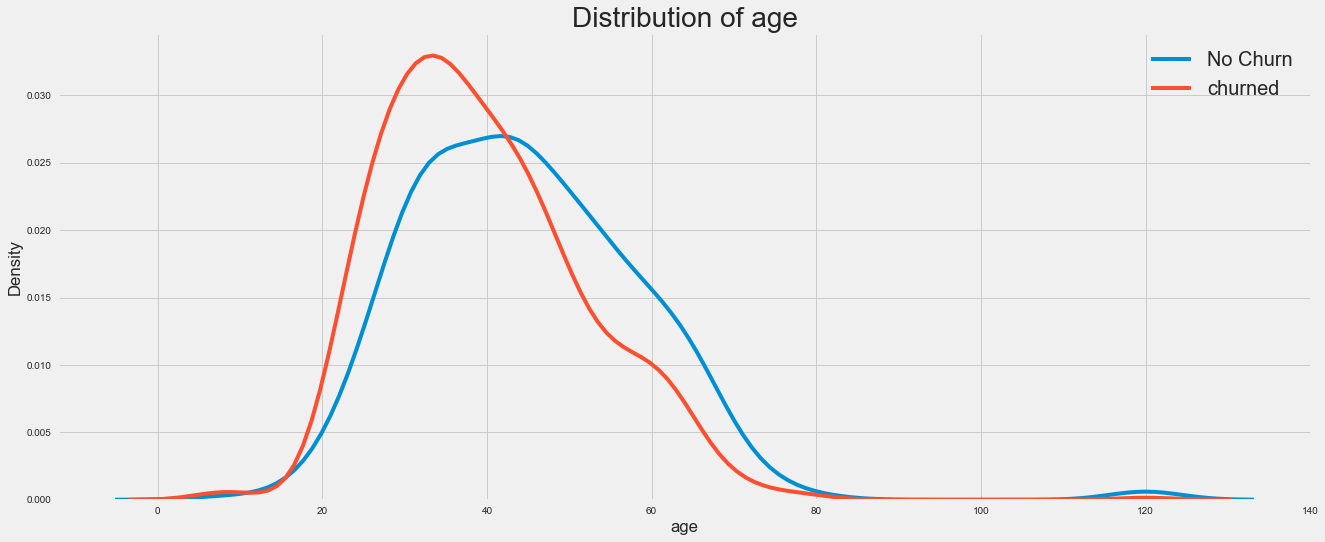

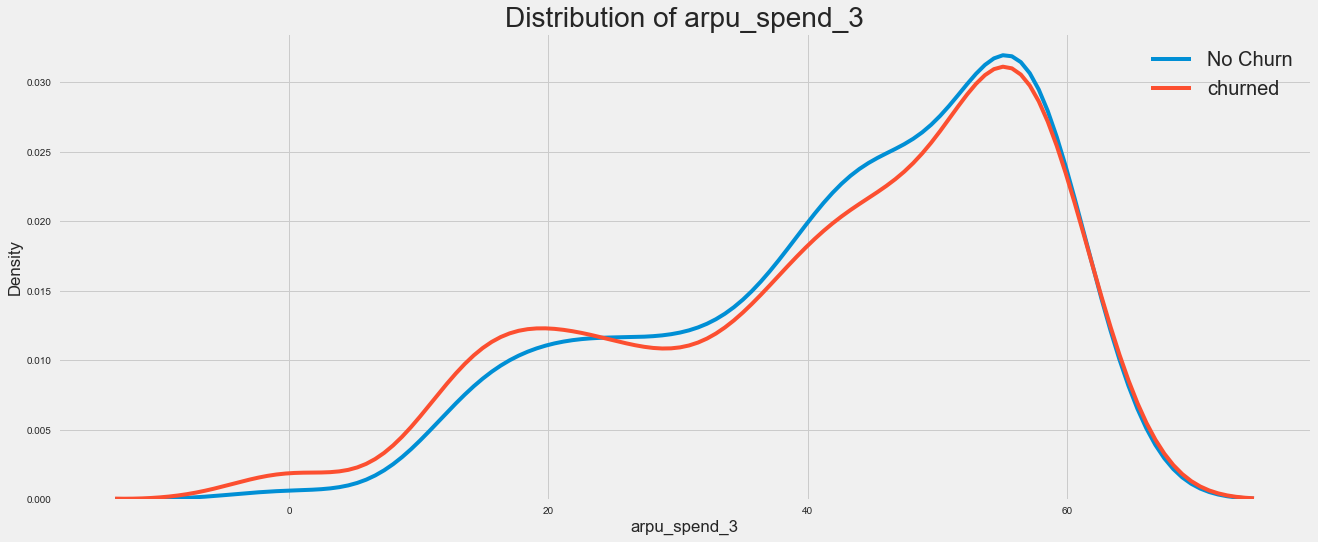

In [675]:
# Iterate through features
for feature, name in zip(['age', 'months_with_network'], ['age','arpu_spend_3']):
    plt.figure(figsize=(20, 8))

    # Iterate through values of the label
    for label, grouped in train_with_labels.groupby('churned'):
        # Plot the distribution of the feature
        sns.kdeplot(grouped[feature].dropna(),
                    label='churned' if label == 1 else 'No Churn')
    # Plot labeling
    plt.ylabel('Density')
    plt.xlabel(f'{name}')
    plt.title(f'Distribution of {name}', size=28)
    plt.legend(prop={'size': 20})

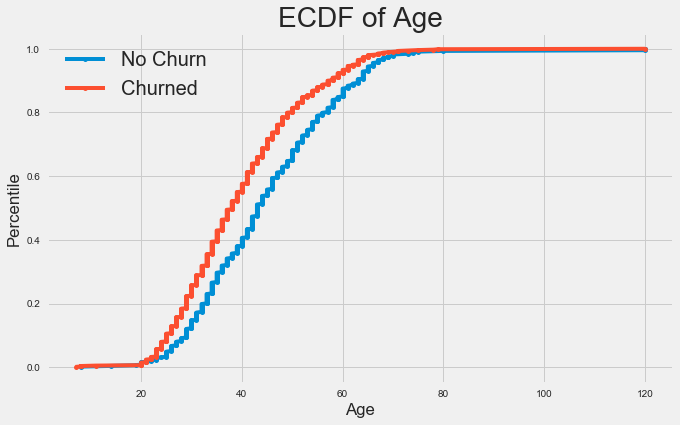

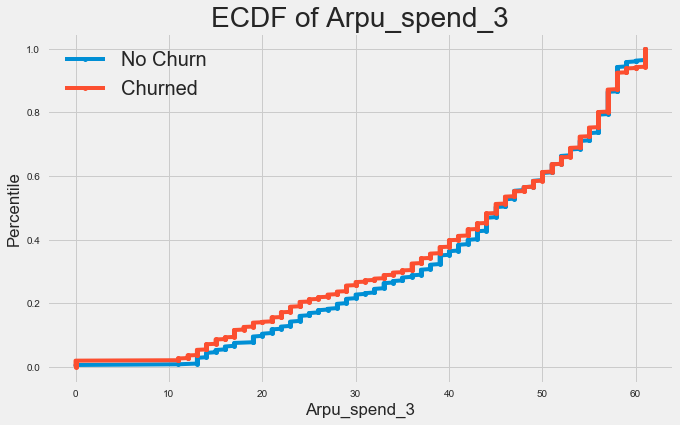

In [676]:
# Iterate through features
for feature, name in zip(['age', 'months_with_network'], ['age','arpu_spend_3']):
    plt.figure(figsize=(10, 6))

    # Iterate through values of the label
    for label, grouped in train_with_labels.groupby('churned'):
        xs, ys = ecdf(grouped[feature])

        # Plot the distribution of the feature
        plt.plot(xs, ys, marker='.', ms=10,
                 label='Churned' if label == 1 else 'No Churn')

    # Plot labeling
    plt.ylabel('Percentile')
    plt.xlabel(f'{name.capitalize()}')
    plt.title(f'ECDF of {name.capitalize()}', size=28)
    plt.legend(prop={'size': 20})

# Make Predictions

Now we will use the trained model to make predictions on the hold-out testing set. We'll can make predictions in terms of probabilities and then threshold them to labels using our selected threshold.

In [677]:
test = pd.read_csv(r'../data/customers_test_data_clean.csv')
test.head()

,age,name,months_with_network,months_on_freemium,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,stk_spend_5,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6,Gender_Not_Specified,Female,Male
0,8,1,54,0,14,1821460,0,2636480,3231100,1866050,1187200,633,865,661,439,1415,1194,1,0,0
1,45,1,55,7,12,223050,0,11500,130455,55000,271263,5,9,4,12,21,11,0,1,0
2,65,1,49,8,10,44450,53770,69000,44600,51000,38150,39,20,29,30,8,32,0,1,0
3,55,1,29,8,9,2150,0,25550,92500,25600,63400,135,23,51,252,1,142,1,0,0
4,41,1,45,9,7,74155,0,96000,19800,49980,30680,78,119,199,349,268,172,1,0,0


In [678]:
test_values = np.array(test)
test_values.shape

(1186, 20)

In [679]:
customers_enc.head()

,age,name,months_with_network,months_on_freemium,churned,region,stk_spend_1,stk_spend_2,stk_spend_3,stk_spend_4,...,stk_spend_6,arpu_spend_1,arpu_spend_2,arpu_spend_3,arpu_spend_4,arpu_spend_5,arpu_spend_6,Gender_Not_Specified,Female,Male
0,8,1,54,0,1,14,1821460,0,2636480,3231100,...,1187200,633,865,661,439,1415,1194,1,0,0
1,45,1,55,7,1,12,223050,0,11500,130455,...,271263,5,9,4,12,21,11,0,1,0
2,65,1,49,8,1,10,44450,53770,69000,44600,...,38150,39,20,29,30,8,32,0,1,0
3,55,1,29,8,1,9,2150,0,25550,92500,...,63400,135,23,51,252,1,142,1,0,0
4,41,1,45,9,1,7,74155,0,96000,19800,...,30680,78,119,199,349,268,172,1,0,0


In [680]:
new_probs = rf_clf.predict_proba(test_values)[:, 1]

prediction_df = pd.DataFrame({'probability': new_probs})
prediction_df['prediction'] = prediction_df['probability'] > threshold_required
prediction_df.sample(10)

,probability,prediction
942,0.629,True
679,0.801,True
914,0.400,False
1095,0.330,False
29,0.517,True
565,0.748,True
796,0.317,False
583,0.542,True
560,0.482,True
1149,0.536,True


Text(0.5, 1.0, 'Distribution of Predicted Probabilities')

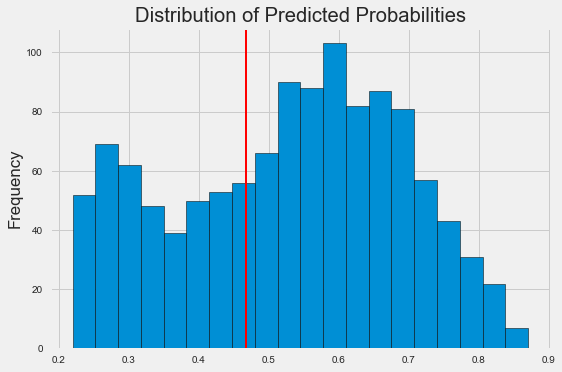

In [681]:
prediction_df['probability'].plot.hist(bins=20, edgecolor='k')
plt.axvline(x=threshold_required, color='r', linewidth=2)
plt.title('Distribution of Predicted Probabilities')

The model is confident that most of the predictions are churns. Moreover, there are a number of probabilities that are exactly the same as can be seen in the [empirical cumulative density function](https://en.wikipedia.org/wiki/Empirical_distribution_function). 

Text(0, 0.5, 'Percentile')

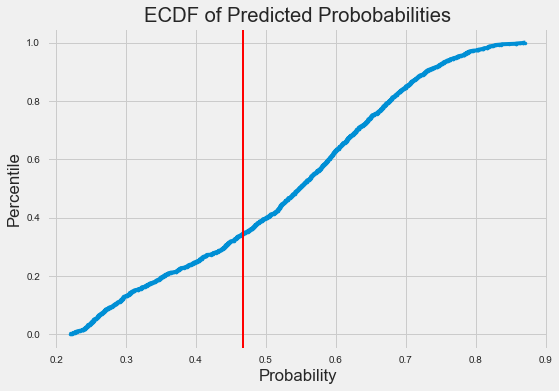

In [682]:
xs, ys = ecdf(prediction_df['probability'])
plt.plot(xs, ys, marker='.')
plt.title('ECDF of Predicted Probobabilities')
plt.axvline(x=threshold_required, color='r', linewidth=2)
plt.xlabel('Probability')
plt.ylabel('Percentile')

# Business Value Analysis

Using the metrics from the model, we can conduct an analysis of the business value of our solution. We'll use the precision and recall along with a few assumptions.

* Typical plan price = 150 (Rand)
* Reduced plan price = 130 (Rand)
* Recall = 75%
* Precision = 82.9%
* Conversion Rate = 75%

$$\text{Recall} = \frac{TP}{TP + FN}$$

$$\text{Precision} = \frac{TP}{TP + FP}$$

We can scale our analysis to the entire dataset since we only used a subset of it for modeling. We'll assume we are able to achieve the same performance on the entire dataset, which is reasonable because the accuracy of a model generally improves as the amount of data used increases.

In [683]:
plan_price = 150
r_plan_price = 130
recall = recall_attained
precision = precision_attained
conversion_rate = 0.75

# Find total number of members
n_members = pd.read_csv(r'../data/customers_test_data_clean.csv').shape[0]
monthly_revenue = n_members * plan_price
churn_rate = np.mean(customers_enc['churned'])

churns = int(churn_rate * n_members)
# Find the typical monthly revenue lost to churned customers
revenue_lost_churns = n_members * churn_rate * plan_price
print(f'Typical monthly revenue lost to {churns} churned customers = R{revenue_lost_churns:,.2f} (RND).')
print(f'Typical total monthly revenue = R{monthly_revenue:,.2f}.')
print(f'Churns losses represent {100 * (revenue_lost_churns / monthly_revenue):.2f}% of monthly revenue.')

Typical monthly revenue lost to 738 churned customers = R110,700.00 (RND).
Typical total monthly revenue = R177,900.00.
Churns losses represent 62.23% of monthly revenue.


In [684]:
recall

0.815

In [685]:
precision_attained

0.8016528925619835

In [686]:
# Find stats for entire dataset
true_positives = int(churns * recall)
false_negatives = int(churns - true_positives)
false_positives = int((true_positives * (1 - precision)) / precision)

print(f'True positives: {true_positives}; False negatives: {false_negatives}; False positives: {false_positives}.')

True positives: 601; False negatives: 137; False positives: 148.


As a sanity check, we'll make sure the precision and recall metrics come out right.

In [687]:
precision_ = ((true_positives) / (true_positives + false_positives))
print('Precision: ', precision_)

Precision:  0.8024032042723631


In [688]:
recall_ = ((true_positives) / (true_positives + false_negatives))
print("Recall: ", recall_)

Recall:  0.8143631436314364


Things look right here.

In [689]:
revenue_lost_false_positives = false_positives * (plan_price - r_plan_price)
revenue_lost_false_negatives = false_negatives * plan_price
revenue_recouped_true_positives = conversion_rate * (true_positives * r_plan_price)

print(f'Cost from false positives = R{revenue_lost_false_positives:,.2f} (RND)')
print(f'Cost from false negatives = R{revenue_lost_false_negatives:,.2f} (RND)')
print(f'Revenue recouped from true positives = R{revenue_recouped_true_positives:,.2f} (RND).')

Cost from false positives = R2,960.00 (RND)
Cost from false negatives = R20,550.00 (RND)
Revenue recouped from true positives = R58,597.50 (RND).


In [690]:
total_effect = revenue_lost_churns - (-revenue_recouped_true_positives + revenue_lost_false_positives + revenue_lost_false_negatives)
us_dollars = total_effect * 0.10
print(f'Total Effect of identifying churns R{total_effect:,.2f} (RND) = R{us_dollars:,.2f} (RAND).')
print(f'This represents {100 * (total_effect / revenue_lost_churns):.2f}% of the losses due to churns.')

Total Effect of identifying churns R145,787.50 (RND) = R14,578.75 (RAND).
This represents 131.70% of the losses due to churns.


Our model has successfully solved the business problem, recouping over 10% of the losses due to churns. This does require a number of assumptions, but with additional refinement, our model could probably deliver even greater value.

# Automated Model Optimization Using TPOT

If we are not pleased with the model results using an off-the-shelf algorithm from Scikit-Learn, there are a number of libraries for searching for the best model without any manual intervention. One of the easiest-to-se libraries is known as TPOT. This will search through hundreds of machine learning models, using evolutionary algorithms to guide the discovery process.

To evaluate the models, we'll use a TimeSeriesSplit. This makes three splits of the data based on the indexes so we need to ensure that our data is sorted by time (already done). 

In [691]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3)

Now we make a `TPOTClassifier` object and pass in a few parameters. This particular use case will search 100 models, using `f1` scoring, the TimeSeriesSplit for cross validation, and taking advantage of all the cores on our machine.

In [692]:
from tpot import TPOTClassifier

# Make tpot pipeline
tpot_pipeline = TPOTClassifier(generations=10, population_size=10,
                               cv=tss, scoring='f1',
                               n_jobs=-1, verbosity=2,
                               random_state=50)

In [693]:
tpot_pipeline.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.7954148307316706
Generation 2 - Current best internal CV score: 0.8066874148710065
Generation 3 - Current best internal CV score: 0.8066874148710065
Generation 4 - Current best internal CV score: 0.8066874148710065
Generation 5 - Current best internal CV score: 0.8066874148710065
Generation 6 - Current best internal CV score: 0.8066874148710065
Generation 7 - Current best internal CV score: 0.8066874148710065
Generation 8 - Current best internal CV score: 0.8108734531564764
Generation 9 - Current best internal CV score: 0.8206786381045864
Generation 10 - Current best internal CV score: 0.8206786381045864

Best pipeline: RandomForestClassifier(Binarizer(input_matrix, threshold=0.25), bootstrap=False, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=13, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1,
        cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=10,
        random_state=50, scoring='f1', subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

In [694]:
tpot_pipeline.fitted_pipeline_

Pipeline(memory=None,
     steps=[('binarizer', Binarizer(copy=True, threshold=0.25)), ('randomforestclassifier', RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None,
            max_features=0.6500000000000001, max_leaf_nodes=None,
            min_impurity_decrease=0.0, ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [695]:
tpot_pipeline.export(r'../data/best_pipeline_new.py')

In [696]:
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import IPython

filename = r'../data/best_pipeline_new.py'
with open(filename) as f:
    code = f.read()

formatter = HtmlFormatter()
IPython.display.HTML('<style type="text/css">{}</style>{}'.format(
    formatter.get_style_defs('.highlight'),
    highlight(code, PythonLexer(), formatter)))

In [697]:
from sklearn.ensemble import ExtraTreesClassifier

exported_pipeline = ExtraTreesClassifier(bootstrap=False,
                                         criterion="entropy",
                                         max_features=0.1,
                                         min_samples_leaf=5,
                                         min_samples_split=8,
                                         n_estimators=100,
                                         random_state=50,
                                         n_jobs=-1)

In [698]:
model, preds = preprocess.evaluate(exported_pipeline, X_train, y_train, X_test, y_test)


ExtraTreesClassifier

ROC AUC: 0.675
precision_score: 0.6685
recall_score: 1.0
f1_score: 0.8013


Now we can do the same procedure as before, looking at the precision recall curve and finding the threshold needed for a recall of 75%.

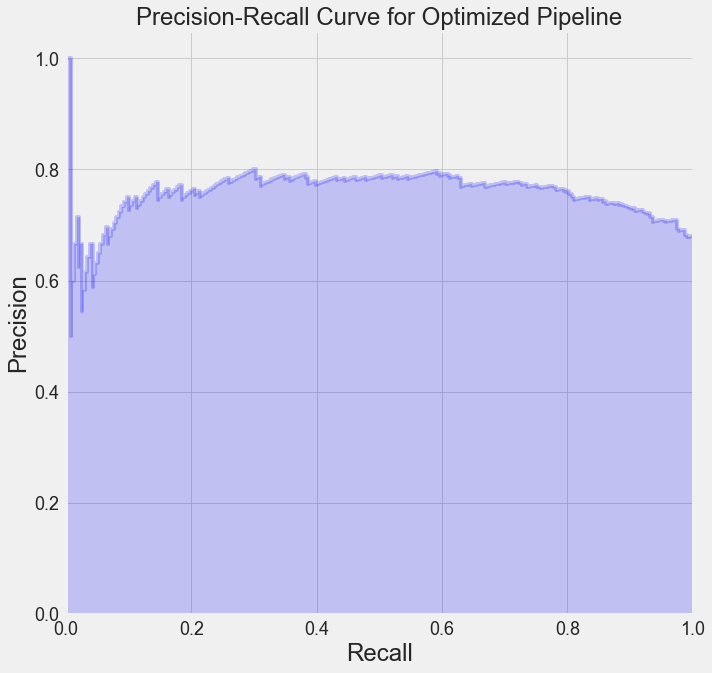

In [699]:
probs = model.predict_proba(X_test)[:, 1]
# pr_data = plot_precision_recall(y_test, probs, title='Precision-Recall Curve for Optimized Pipeline')

pr_data = preprocess.updated_plot_precision_recall(y_test, probs, title='Precision-Recall Curve for Optimized Pipeline')

In [700]:
recall_above = pr_data.loc[pr_data['recall'] >= recall_attained].copy()
recall_above.sort_values('precision', ascending=False, inplace=True)
recall_above.head()

,precision,recall,threshold
85,0.751,0.836,0.589
86,0.750,0.832,0.589
87,0.749,0.828,0.590
80,0.748,0.849,0.589
84,0.748,0.836,0.589


In [701]:
precision_attained = recall_above.iloc[0, 0]
threshold_required = recall_above.iloc[0, -1]

print(f'At a threshold of {round(threshold_required, 4)} the recall is {100 * recall_attained:.2f}% and the precision is {round(100 * precision_attained, 4)}%')

At a threshold of 0.5895 the recall is 81.50% and the precision is 75.0943%


The Random Forest Classifier built by hand does basically the sameas the TPOT optimized model. Running the optimization for longer may result in a better model. However, in terms of time investment, a better option is probably to spend more time on feature engineering. 

Confusion matrix, without normalization
[[ 52  66]
 [ 39 199]]


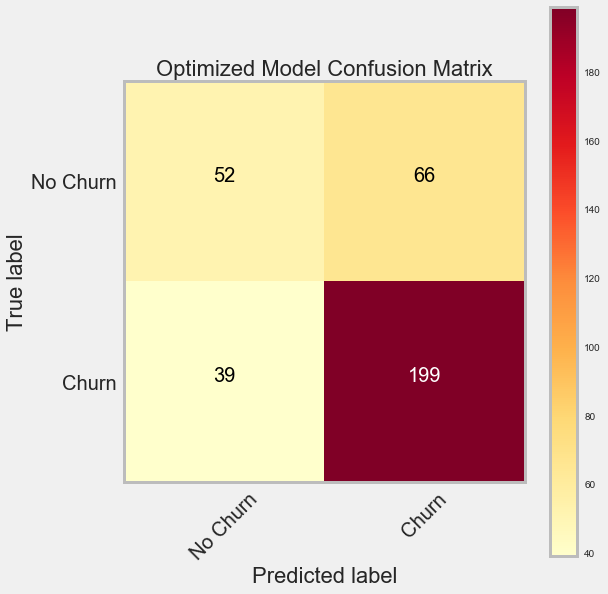

In [702]:
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

cm = confusion_matrix(y_test, preds)
preprocess.plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],title='Optimized Model Confusion Matrix')

# Conclusions

Our final tuned model was able to achieve a recall of 75% and a precision of 8.31%, a significant increase over the naive baseline of 3.5% recall and 1.0% precision. 

Overall, the final metrics from modeling are:

precision	recall	threshold
118	0.772	0.752	0.595

| Model                                     | ROC AUC | Recall | Precision | F1 Score |
|-------------------------------------------|---------|--------|-----------|----------|
| Naive Baseline (no ml)                    | 0.5     | 3.47%  | 1.04%     | 0.016    |
| Logistic Regression                       | 0.577   | 0.51%  | 2.91%     | 0.009    |
| Random Forest Default                     | 0.929   | 65.2%  | 14.7%     | 0.240    |
| Random Forest Tuned for 75% Recall        | 0.929   | 75%    | 8.31%     | 0.150    |
| Auto-optimized Model                      | 0.675   | 100%   | 66.9%     | 0.801    |
| Auto-optimized Model Tuned for 75% Recall | 0.675   | 75.2%  | 77.2%     | 0.170    |

With these metrics, we can conclude that machine learning has solved the business problem of identifying customers that will churn in the next month. We can now use this model to predict customers at risk for churning in the future. An analysis of the business payback also showed that the final model delivered significant value. The predictions would then be handed off to the customer engagement team to hopefully reduce the number of churns.

The framework for solving this problem - and for solving any problem with machine learning - was:

1. Prediction Engineering: define the business objective, translate into a machine learning task, and create a set of labeled historical examples with cutoff time from the data.
2. Feature Engineering: use the label times to automatically build hundreds of relevant and valid features for each label.
3. Modeling: use a machine learning algorithm implemented in common Python libraries to train a model to predit the labels from the features. Validate and tune model for the business need and then make predictions on new data.

![](../images/Framework.png)

This approach solves a number of problems: it standardizes the traditionally ad-hoc process of solving a problem with machine learning and it is general so that nearly the same code can be used for multiple prediction problems on the same dataset. The benefits of machine learning have been limited to a few companies both because of the lack of a shared language for expressing and solving problems, and because each solution requires custom code and must be completely rebuilt for a different prediction problem. By codifying the processes needed to solve problems with machine learning, we aim to make it easier for companies to use this transformational technology. 

Furthermore, the framework lets data scientists fill in the details with existing tools allowing for rapid development and deployment of model pipelines. The achievements of machine learning are already impressive, but with a scaffolding in place the benefits can be extended to a broader population.


## Deployment

<p>Since this is a case study motivated by a single, static dataset, we cannot actually deploy our churn prediction model. However, we can certainly consider how we might intend to put the model to use. There are many important considerations when deploying a prediction model in an industrial application. They two we'll discuss specifically are:

<ul>
    <li>How do we incorporate model output into a decision making framework?</li>
    <li>How might we implement the model to support production level systems?</li>
</ul>

<br><br>
<i><b>An Expected Value Framework for Churn Reduction</b></i>
<br><br>
The most important point to remember when doing data science is that a great prediction model doesn't alone solve our problem. Ultimately, the value we get from data and analytics comes from doing things differently because of that very data and analytics. One common way to use a model in churn reduction is to proactively reach out to at-risk customers with some form of an intervention strategy. Example interventions might include a personalized call from a customer service rep or an email with some targeted message. Beyond establishing a conversation with the customer, our interventions might likely include some special offer or discount that reduces the financial obligations of the customer. <br><br>

It is pretty likely that any of our intervention strategies would come with some form of risk. Example costs that we might occur are: 1). the expense of calling someone from a call center, 2). annoying a user with too much email, 3). giving someone a discount or special offer when they indeed had no intention to churn. While all of these are important, the last point is likely the one that could have the biggest impact on overall revenues. We need to design a logical system here to choose when and when not to intervene. We can use expected values to design such a system. 
<br><br>
The two main ingredients to our expected value formulation are the likelihood of the customer churning, and the expected lifetime value of the customer if (s)he should not churn. We'll call these $P(Y=1|X)$ and $E[LTV|X, Y=0]$. Note that we defined these conditional on the user attributes $X$, as this is how our churn prediction model is defined. Now let's define a variable $A \in \{0,1\}$, where $A=1$ means we perform an intervention, and $A=0$ means we don't. <br><br>

Our goal here is to maximize the expected lifetime value of each customer. For now, we have one decision lever - to intervene or not. From here, the decision apparatus is quite simple: intervene if doing so results in a higher expected value for the customer! In more formal terms, on each user with features $X=x$, intervene if:<br><br>

<center>$(1 - P(Y=1|X=x, A=1))*E[LTV|X=x, Y=0, A=1] > (1 - P(Y=1|X=x, A=0))*E[LTV|X=x, Y=0, A=0]$</center>

<br><br>
Defining this decision rule both formally and informally is quite straightforward. Actually estimating it on the other hand is actually not at all straightforward. Our churn model (the focus of all of the above analysis), takes care of the quantity $P(Y=1|X, A=0)$, but will this estimate reflect churn probabilities if we decide to intervene? Sadly, the answer is likely no. To get an accurate estimate of $P(Y=1|X=x, A=1)$, we need to actually intervene on a set of users and test the effect of the intervention. This basically suggests we should design a controlled experiment and spend some resources collecting the appropriate data (see, the modeling is just one part of the process). <br><br>

Additionally, we need to estimate accurate lifetime values (for now, we'll fold the cost of the intervention into the LTV). This is a highly non-trivial task, and doing it in a timely manner might require making many simplyfying assumptions. As this step is out of scope for this case study, we'll leave it as a discussion point. But for any reader deploying such a system in a real company, this is certainly a step that shouldn't be ignored.<br><br>


<i><b>A Simple Production Scoring Architecture</b></i><br><br>

Every deployed prediction modeling system has at least two components. These are the training module as well as the scoring module. Remember, it is through the application of the model that data and predictive analytics will add value, so the scoring system is critical to get right. Firms often have to make a decision whether or not to automate a modeling and scoring system. The right answer is ultimately company and project specific, but let's assume that for our company here we're interested in tackling the scoring system first. <br><br>

Before writing any production code, we'll want to design a basic architecture for the system. In doing this, we'll want to specify the data dependencies, the data schemas and the process flows. We need to start by understanding and articulating our use cases. Given a working churn prediction model, we need a system that can support two cases: 1). periodically create lists of at-risk churners for proactive outreach, 2). look up churn risk for in-bound call center requests. An example of such an architecture is here:


</p>


![](../references/churn_architecture.png)

<p>Here is a quick description of each component in the above:<br>
<ul>
    <li>Activity Logs & User Info - These are the raw data systems that will ultimately be processed into modelable features</li>
    <li>Feature Engineering Pipeline - This is the code that transforms raw log and data base information into structured model features. This pipeline should be identical to that used in the training phases</li>
    <li>Churn Model DB - This is a data store that holds the actual prediction models (whether they be coefficients of a logistic regression, rules from a decision tree or python classifier objects)</li>
    <li>Scoring Module - This module takes in structured features of a user and a model to produce a prediction.</li>
    <li>User Churn Scores - This is a database that holds the most recently updated user churn prediction score.</li>
</ul>
<br>
At this stage of implementation a lot of decisions will have to be made, such as, do we need to score users in real time or will some periodic batch update suffice? These are all application specific, but they do have implications for how the system and schemas are designed (not to mention what data storage systems will be used). <br><br>

<i>Extending our system</i><br><br>

Let's assume we're working for a truly agile company and we build things iteratively and as truly needed. Based on our research we had a working and validated model. Our first deployment project was to build the system that automatically scores users and stores the scores in a database. After a few successful months of using our system, we might decide that we need to update the prediction model. This is something that of course can always be done manually (repeating everything from above), but it is also worth considering building an automated system for doing so. This investment will ultimately free up research time for exploring new problems, or making the churn models even better. <br><br>

Here is an example architecture where we extend the scoring system to include model updating. 

</p>

<p>This extension should be fairly cheap, as we have already built out the feature engineering pipeline that performs much of the data processing. One interesting implication of the above design is that we need to automate a lot of the decision making above that we originally did manually. This is out of the scope of this case study, but this is one of the most exciting areas of industrial data science research!


</p>

## Wrap Up

<p>We have said a lot already, so this will be short! In this case study we tried to be thorough enough to cover all stages of defining, building and using a data science product in an industrial setting. Of course, an entire course can be taught on every element of this case study, so invariably, certain details have been left out. If you feel you have any suggestions on how to improve this case study, feel free to reach out at: briand at gmail dot com.

</p>


Our `pipeline` is looking pretty swell & fairly decent to go the most important step of the tutorial: __Serialize the Machine Learning Model__

### 3. Saving Machine Learning Model : Serialization & Deserialization

>In computer science, in the context of data storage, serialization is the process of translating data structures or object state into a format that can be stored (for example, in a file or memory buffer, or transmitted across a network connection link) and reconstructed later in the same or another computer environment.

In Python, `pickling` is a standard way to store objects and retrieve them as their original state. To give a simple example:

In [703]:
import dill as pickle

filename = r'../data/model_v1.pk'
with open(filename, 'wb') as f:
    pickle.dump(rf_clf, f)


So our model will be saved in the location above. Now that the model `pickled`, creating a `Flask` wrapper around it would be the next step.

Before that, to be sure that our `pickled` file works fine -- let's load it back and do a prediction:

In [704]:
with open(filename ,'rb') as f:
    loaded_model = pickle.load(f)

In [705]:
new_probs_api = loaded_model.predict_proba(test_values)[:, 1]
prediction_df = pd.DataFrame({'probability': new_probs_api})
prediction_df['prediction'] = prediction_df['probability'] > threshold_required
prediction_df.sample(10)

,probability,prediction
404,0.506,False
1157,0.512,False
1001,0.538,False
873,0.408,False
814,0.281,False
378,0.706,True
987,0.294,False
841,0.572,False
269,0.556,False
284,0.711,True


Since, we already have the `preprocessing` steps required for the new incoming data present as a part of the `pipeline` we just have to run `predict()`. While working with `scikit-learn`, it is always easy to work with `pipelines`. 

`Estimators` and `pipelines` save you time and headache, even if the initial implementation seems to be ridiculous. Stich in time, saves nine!

# Use Flask to serve a machine learning model as RESTful API


### Overview 

<p> Most of us know how to

    * Write machine learning models
    * Train them 
    * Test them as well 
 <p/>

<p>But how do we deploy them for production? 

Well in this repo I'm going to explain how to deploy machine learning models to production using [Flask](http://flask.pocoo.org/) (a micro web framework written in Python), in addition how to serve them as a RESTful API (web services). So I will be building just a simple model in order to walk you through the essential stuff ...

### App architecture 

Let's create a Flask app to serve a simple random forest model as a RESTful API around iris built in data. The app will allow the user to request the server in order to predcit whether a given flower is Setosa, Versicolour or Virginica. <p/>

![](../references/ml.png)

### Import required libraries 



### Creating an API using Flask

<p>We'll keep the folder structure as simple as possible:

![Folder Struct](https://raw.githubusercontent.com/pratos/flask_api/master/notebooks/images/flaskapp3.png)

There are three important parts in constructing our wrapper function, `apicall()`:

- Getting the `request` data (for which predictions are to be made)

- Loading our `pickled estimator`

- `jsonify` our predictions and send the response back with `status code: 200`

HTTP messages are made of a header and a body. As a standard, majority of the body content sent across are in `json` format. We'll be sending (`POST url-endpoint/`) the incoming data as batch to get predictions.

(__NOTE:__ You can send plain text, XML, csv or image directly but for the sake of interchangeability of the format, it is advisable to use `json`) <p/>

Once the app is running we can request it for predictions

 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger pin code: 580-987-602
Let's ask the random forest model through the web service to get which class the following flower belongs to. The flower's features are:

Let's generate some prediction data and query the API running locally at `https:127.0.0.1:9000/predict`

In [771]:
import json
import requests

"""Setting the headers to send and accept json responses
"""
headers = {"Content-Type": "application/json", "cache-control": "no-cache",
                   "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:62.0) Gecko/20100101 Firefox/62.0"}

"""Reading test batch
"""
# df = pd.read_csv('../data/test.csv', encoding="utf-8-sig")
df = pd.read_csv(r'../data/customers_test_data_clean.csv')
df = df.head()

"""Converting Pandas Dataframe to json
"""
data = df.to_json(orient='columns')
data

'{"age":{"0":8,"1":45,"2":65,"3":55,"4":41},"name":{"0":1,"1":1,"2":1,"3":1,"4":1},"months_with_network":{"0":54,"1":55,"2":49,"3":29,"4":45},"months_on_freemium":{"0":0,"1":7,"2":8,"3":8,"4":9},"region":{"0":14,"1":12,"2":10,"3":9,"4":7},"stk_spend_1":{"0":1821460,"1":223050,"2":44450,"3":2150,"4":74155},"stk_spend_2":{"0":0,"1":0,"2":53770,"3":0,"4":0},"stk_spend_3":{"0":2636480,"1":11500,"2":69000,"3":25550,"4":96000},"stk_spend_4":{"0":3231100,"1":130455,"2":44600,"3":92500,"4":19800},"stk_spend_5":{"0":1866050,"1":55000,"2":51000,"3":25600,"4":49980},"stk_spend_6":{"0":1187200,"1":271263,"2":38150,"3":63400,"4":30680},"arpu_spend_1":{"0":633,"1":5,"2":39,"3":135,"4":78},"arpu_spend_2":{"0":865,"1":9,"2":20,"3":23,"4":119},"arpu_spend_3":{"0":661,"1":4,"2":29,"3":51,"4":199},"arpu_spend_4":{"0":439,"1":12,"2":30,"3":252,"4":349},"arpu_spend_5":{"0":1415,"1":21,"2":8,"3":1,"4":268},"arpu_spend_6":{"0":1194,"1":11,"2":32,"3":142,"4":172},"Gender_Not_Specified":{"0":1,"1":0,"2":0,"3":

In [772]:
"""POST <url>/predict
"""
# resp = requests.post("http://br5oajayi:9000/predict", data = json.dumps(data), headers= header)
# resp.status_code
url = "http://br5oajayi:9000/predict"
data = json.dumps(data)
resp = requests.post(url, data, headers = headers)
resp.status_code
"""The final response we get is as follows:
"""
# print(resp.json())
print(resp, resp.text)

<Response [200]> {"predictions":"{\"0\":false,\"1\":false,\"2\":false,\"3\":false,\"4\":false}"}



# How To Reduce Churn Using Customer Journey Analytics

<p> Customer retention is a measure of how many of your customers continue to buy from you over time and are therefore loyal to your brand. Churn, sometimes known as customer attrition, is at the opposite end of the spectrum, i.e. how many customers stop buying from your company.<p/>

<p>
Here are a few reasons why you should care about churn:

* Customer churn reduces profitability through revenue loss
* Churn results in greater marketing and re-acquisition costs
* The probability of selling to an existing customer is a lot higher than to a new prospect
* Knowing the customer churn rate is helpful for calculating customer lifetime value
* It is a measure of the company’s health and long-term prospects
* Customer churn determines whether customer retention is improving

It helps identify which customers and segments are the best fit for your product


<p/>

## Calculate Basic Churn Rate

<p >Two ways to measure churn: 

* customer churn 
* Revenue churn. <p/>

<p>

* Customer churn is the proportion of contractual customers or subscribers who leave a supplier during a given time period.

* Revenue churn, on the other hand, is the proportion of recurring revenue lost in a given time period. Revenue churn is commonly used in SaaS and other business models that rely on recurring revenue models.

<p/>

### Basic methods of calculating your customer churn and revenue churn rates

https://www.pointillist.com/blog/reduce-churn-customer-journey-analytics/

In [231]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin
import pickle
import pandas as pd
# ! pip install flask_cors

# Get headers for payload
header = ['age', 'name', 'months_with_network', 'months_on_freemium', 'region',
       'stk_spend_1', 'stk_spend_2', 'stk_spend_3', 'stk_spend_4',
       'stk_spend_5', 'stk_spend_6', 'arpu_spend_1', 'arpu_spend_2',
       'arpu_spend_3', 'arpu_spend_4', 'arpu_spend_5', 'arpu_spend_6',
       'Gender_Not_Specified', 'Female', 'Male']

filename = r'../data/model_v1.pk'
with open(filename, 'wb') as f:
    pickle.dump(rf_clf, f)
    
with open(filename ,'rb') as f:
    loaded_model = pickle.load(f)

In [232]:
from pandas import DataFrame
df = DataFrame(eval(data))


test_export = df.to_json (r'../data/test_values.json', orient='columns')

# reading the JSON data using json.load()
file = r'../data/test_values.json'
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
train = pd.DataFrame.from_dict(dict_train, orient='columns')
train.reset_index(level=0, inplace=True)
train.head()

ValueError: DataFrame constructor not properly called!

In [223]:
# Test model with data frame
input_variables = pd.DataFrame([[1, 106, 70, 28, 135, 34.2, 0.142, 22]],
                                columns=headers, 
                                dtype=float,
                                index=['input'])
# Get the model's prediction
prediction = model.predict(input_variables)
print("Prediction: ", prediction)
prediction_proba = model.predict_proba(input_variables)
print("Probabilities: ", prediction_proba)

NameError: name 'headers' is not defined

In [779]:
dat = pd.DataFrame([{'SubLevel': 'Gert Sibande', 'TARGET': 145396.08, 'TX_CURR': 127284.38, 'TX_PREV': 127456.73, 'equal': None, 'negative': 1.0, 'positive': np.nan, 'TX-CURR': 1.0}, {'SubLevel': 'King Cetshwayo', 'TARGET': 129013.21, 'TX_CURR': 122740.67, 'TX_PREV': 122797.49, 'equal': None, 'negative': 1.0, 'positive': np.nan, 'TX-CURR': 1.0}, {'SubLevel': 'Nkangala', 'TARGET': 118470.09, 'TX_CURR': 105470.23, 'TX_PREV': 105371.74, 'equal': None, 'negative': np.nan, 'positive': 1.0, 'TX-CURR': 1.0}, {'SubLevel': 'Ugu', 'TARGET': 104360.73, 'TX_CURR': 97628.12, 'TX_PREV': 97659.38, 'equal': None, 'negative': 1.0, 'positive': np.nan, 'TX-CURR': 3.0}])

In [780]:
dat

,SubLevel,TARGET,TX-CURR,TX_CURR,TX_PREV,equal,negative,positive
0,Gert Sibande,145396.080,1.000,127284.380,127456.730,None,1.000,nan
1,King Cetshwayo,129013.210,1.000,122740.670,122797.490,None,1.000,nan
2,Nkangala,118470.090,1.000,105470.230,105371.740,None,nan,1.000
3,Ugu,104360.730,3.000,97628.120,97659.380,None,1.000,nan


In [777]:

cleandat = [x for x in dat if x != 'nan']

In [778]:
cleandat

['SubLevel',
 'TARGET',
 'TX-CURR',
 'TX_CURR',
 'TX_PREV',
 'equal',
 'negative',
 'positive']